In [1]:
# This is used to increase the notebook's width to fill the screen, allowing for better plot visualization
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import cv2
import time
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import plot

C:\Users\leoar\AppData\Local\Temp\ipykernel_15508\2117630889.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Path to Dataset

In [2]:
# Relative path to dataset
data_dir = os.path.join( "..", "..", "..", "..", "Datasets", "COVID19", "Tomografia", "COVIDx CT-3A" )
assert os.path.exists( data_dir ), "Unable to find the relative path to COVIDx CT-3A, please check data_dir..."

#
dataset_name = "COVIDx CT-2A"

## Samples Dataframe

In [3]:
# Path to metadata csv
csv_path = os.path.join( data_dir, "new_split_metadata.csv" )

# Reads metadata as dataframe, "age" column is treated as str since "N/A" can't be int
samples_df = pd.read_csv(csv_path, sep = ";", na_filter = False, dtype={"age": str})

samples_df.head()

filename patient_id source     class country sex   age  \
0  NCP_96_1328_0032.png     NCP_96   CNCB  COVID-19   China   M  74.0   
1  NCP_96_1328_0035.png     NCP_96   CNCB  COVID-19   China   M  74.0   
2  NCP_96_1328_0036.png     NCP_96   CNCB  COVID-19   China   M  74.0   
3  NCP_96_1328_0037.png     NCP_96   CNCB  COVID-19   China   M  74.0   
4  NCP_96_1328_0038.png     NCP_96   CNCB  COVID-19   China   M  74.0   

  partition slice_selection  x_min  y_min  x_max  y_max verified_finding  \
0     train          Expert      9     94    512    405              Yes   
1     train          Expert     10    106    512    405              Yes   
2     train          Expert     10    105    512    406              Yes   
3     train          Expert     11    104    512    406              Yes   
4     train          Expert     11    103    512    406              Yes   

    view modality  
0  Axial       CT  
1  Axial       CT  
2  Axial       CT  
3  Axial       CT  
4  Axial       CT

## Patients Dataframe

In [4]:
# Creates a new dataframe with metadata sorted by patient
patient_df = plot.convert_df_sample2patient( samples_df )

patient_df.head()

patient_id source     class country  sex   age partition slice_selection  \
0     NCP_96   CNCB  COVID-19   China    M  74.0     train          Expert   
1    NCP_270   CNCB  COVID-19   China  N/A   N/A       val          Expert   
2    NCP_322   CNCB  COVID-19   China  N/A   N/A     train          Expert   
3   NCP_1276   CNCB  COVID-19   China  N/A   N/A      test          Expert   
4   NCP_2683   CNCB  COVID-19   China  N/A   N/A      test          Expert   

  verified_finding   view modality  sample_count  
0              Yes  Axial       CT           121  
1              Yes  Axial       CT           124  
2              Yes  Axial       CT            40  
3              Yes  Axial       CT            32  
4              Yes  Axial       CT             9

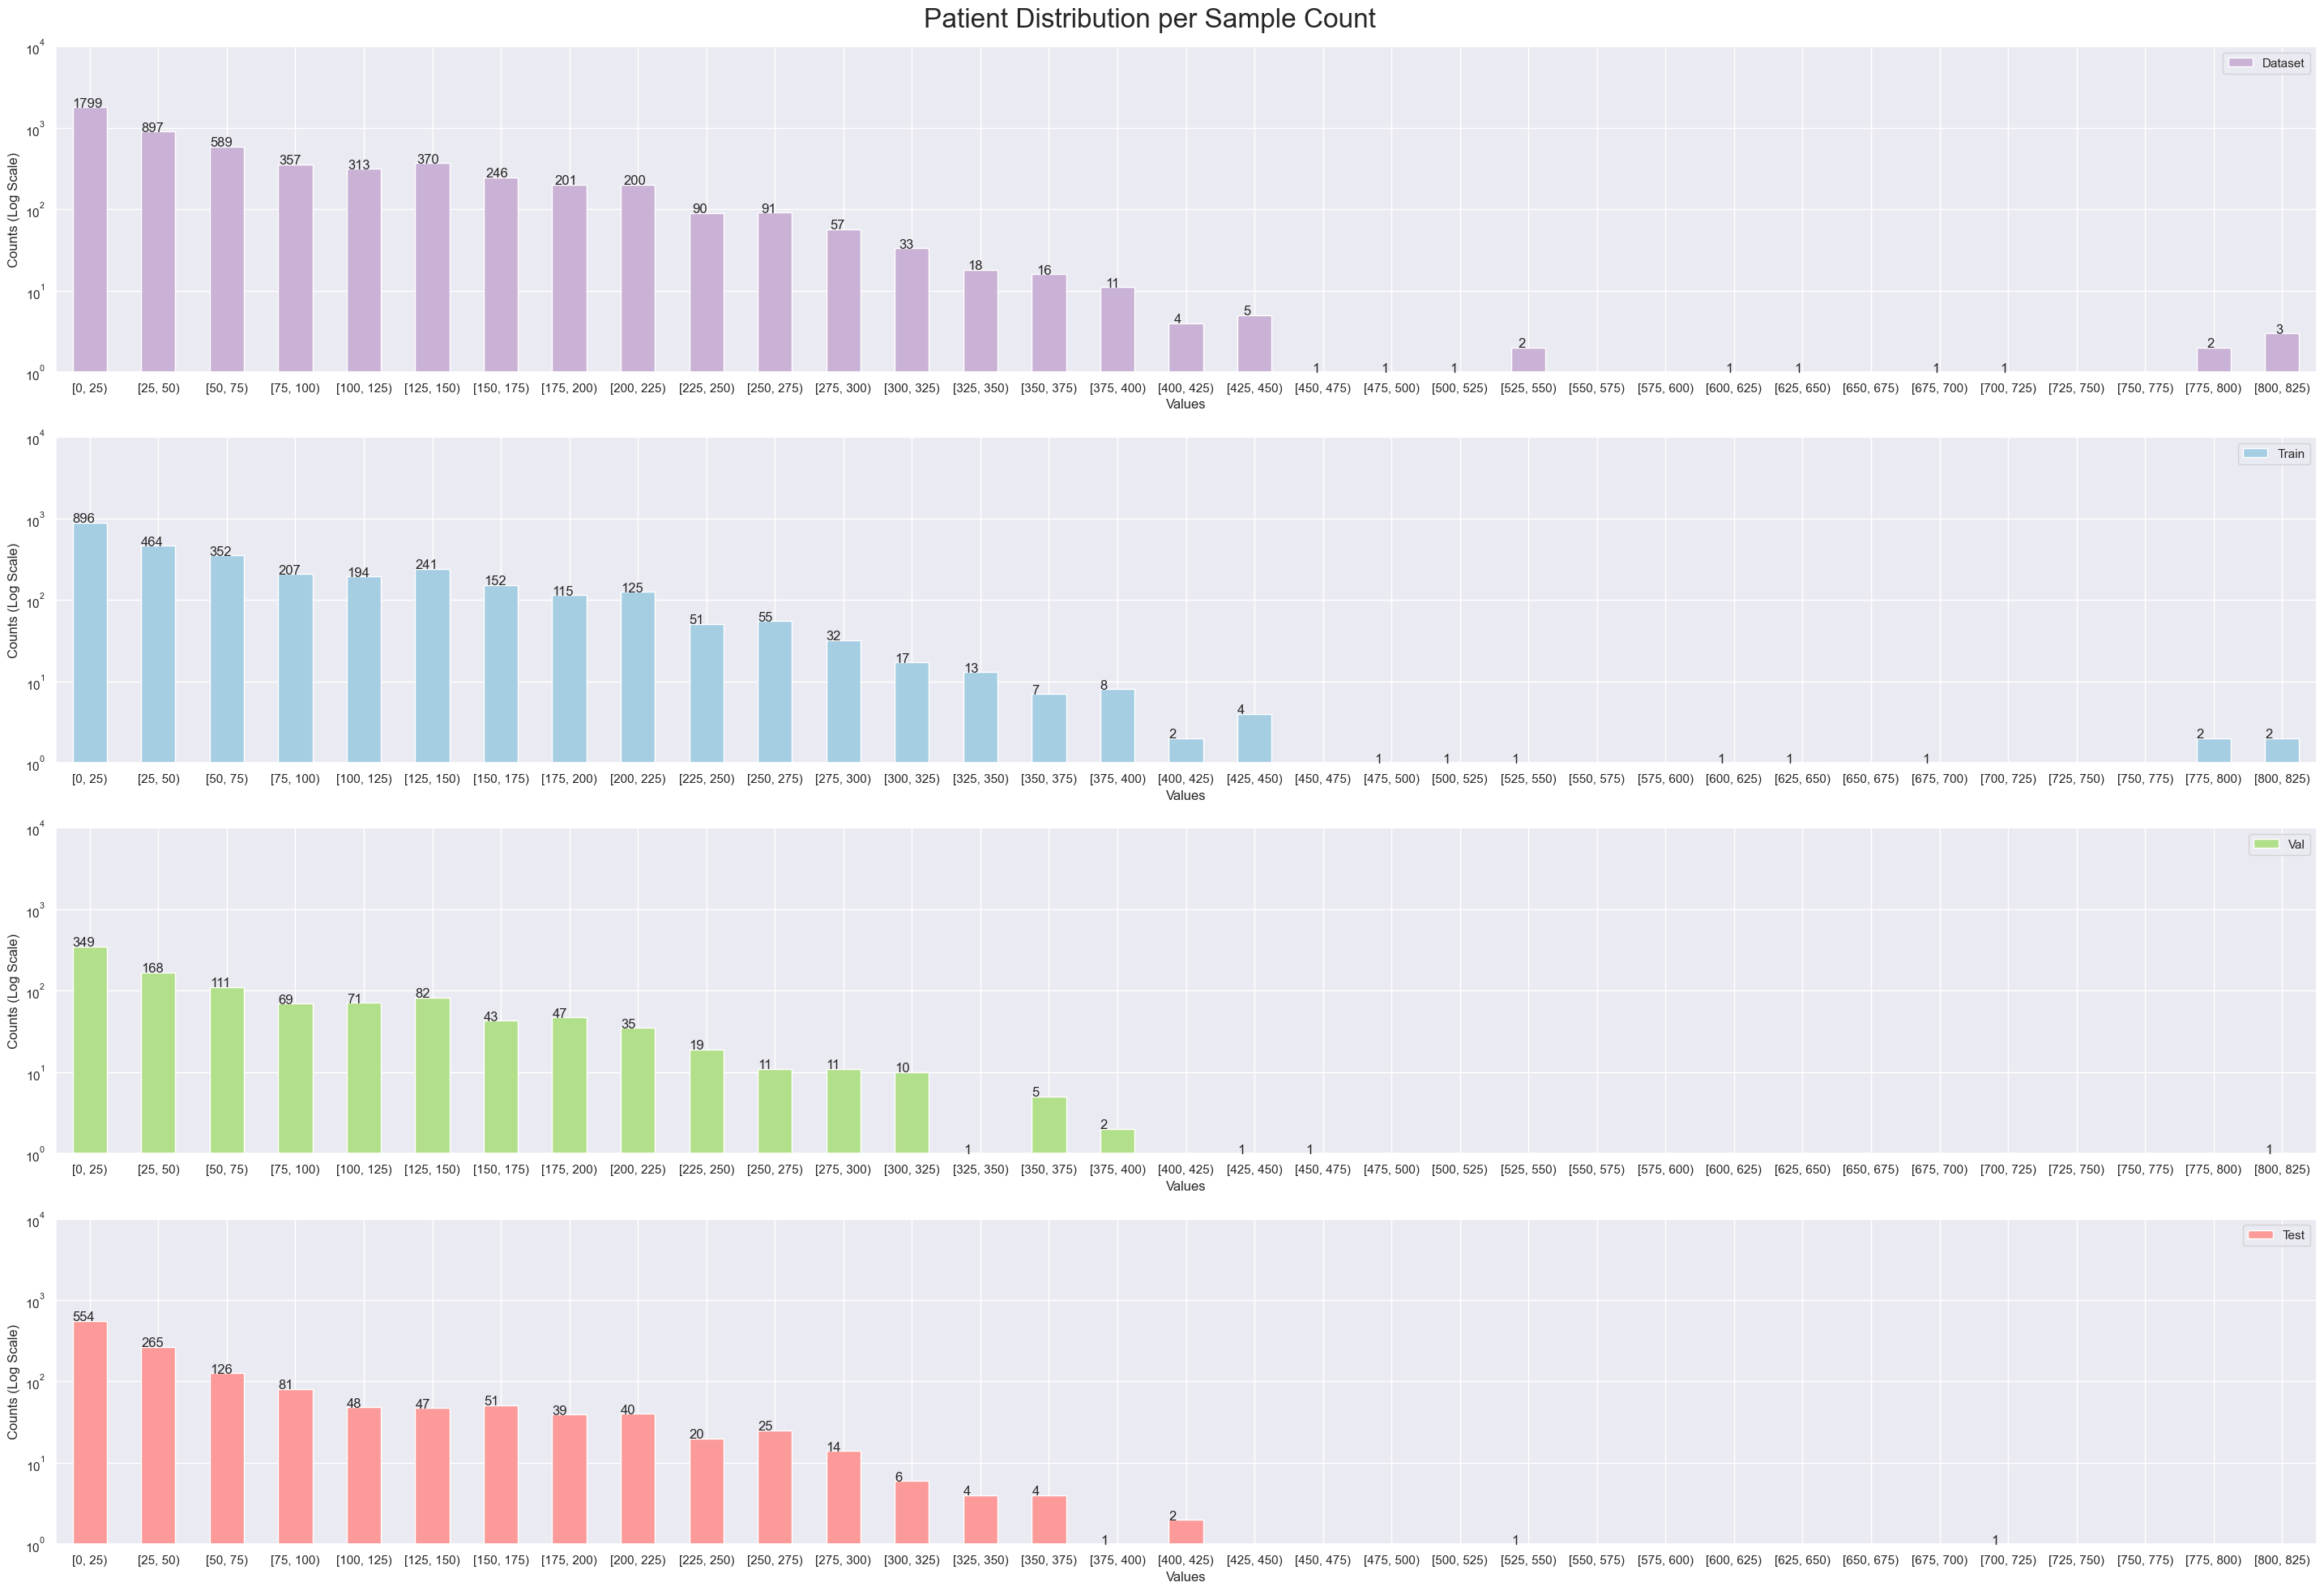

In [5]:
figure = plt.figure( figsize = (36, 24) )
plot.column_per_partition_as_histogram( patient_df, "sample_count", dataset_name, figure, title_complement = "Patient")

In [6]:
counts_df = plot.column_bins_per_partition_as_df( patient_df, "sample_count", dataset_name )
counts_df.head(len(counts_df))

Dataset  Train   Val  Test
Values                                
[0, 25)        1799    896   349   554
[25, 50)        897    464   168   265
[50, 75)        589    352   111   126
[75, 100)       357    207    69    81
[100, 125)      313    194    71    48
[125, 150)      370    241    82    47
[150, 175)      246    152    43    51
[175, 200)      201    115    47    39
[200, 225)      200    125    35    40
[225, 250)       90     51    19    20
[250, 275)       91     55    11    25
[275, 300)       57     32    11    14
[300, 325)       33     17    10     6
[325, 350)       18     13     1     4
[350, 375)       16      7     5     4
[375, 400)       11      8     2     1
[400, 425)        4      2     0     2
[425, 450)        5      4     1     0
[450, 475)        1      0     1     0
[475, 500)        1      1     0     0
[500, 525)        1      1     0     0
[525, 550)        2      1     0     1
[550, 575)        0      0     0     0
[575, 600)        0      0     0     0
[600, 625)        1      1     0     0
[625, 650)        1      1     0     0
[650, 675)        0      0     0     0
[675, 700)        1      1     0     0
[700, 725)        1      0     0     1
[725, 750)        0      0     0     0
[750, 775)        0      0     0     0
[775, 800)        2      2     0     0
[800, 825)        3      2     1     0
SUM            5311   2945  1037  1329

# Plots

## Source

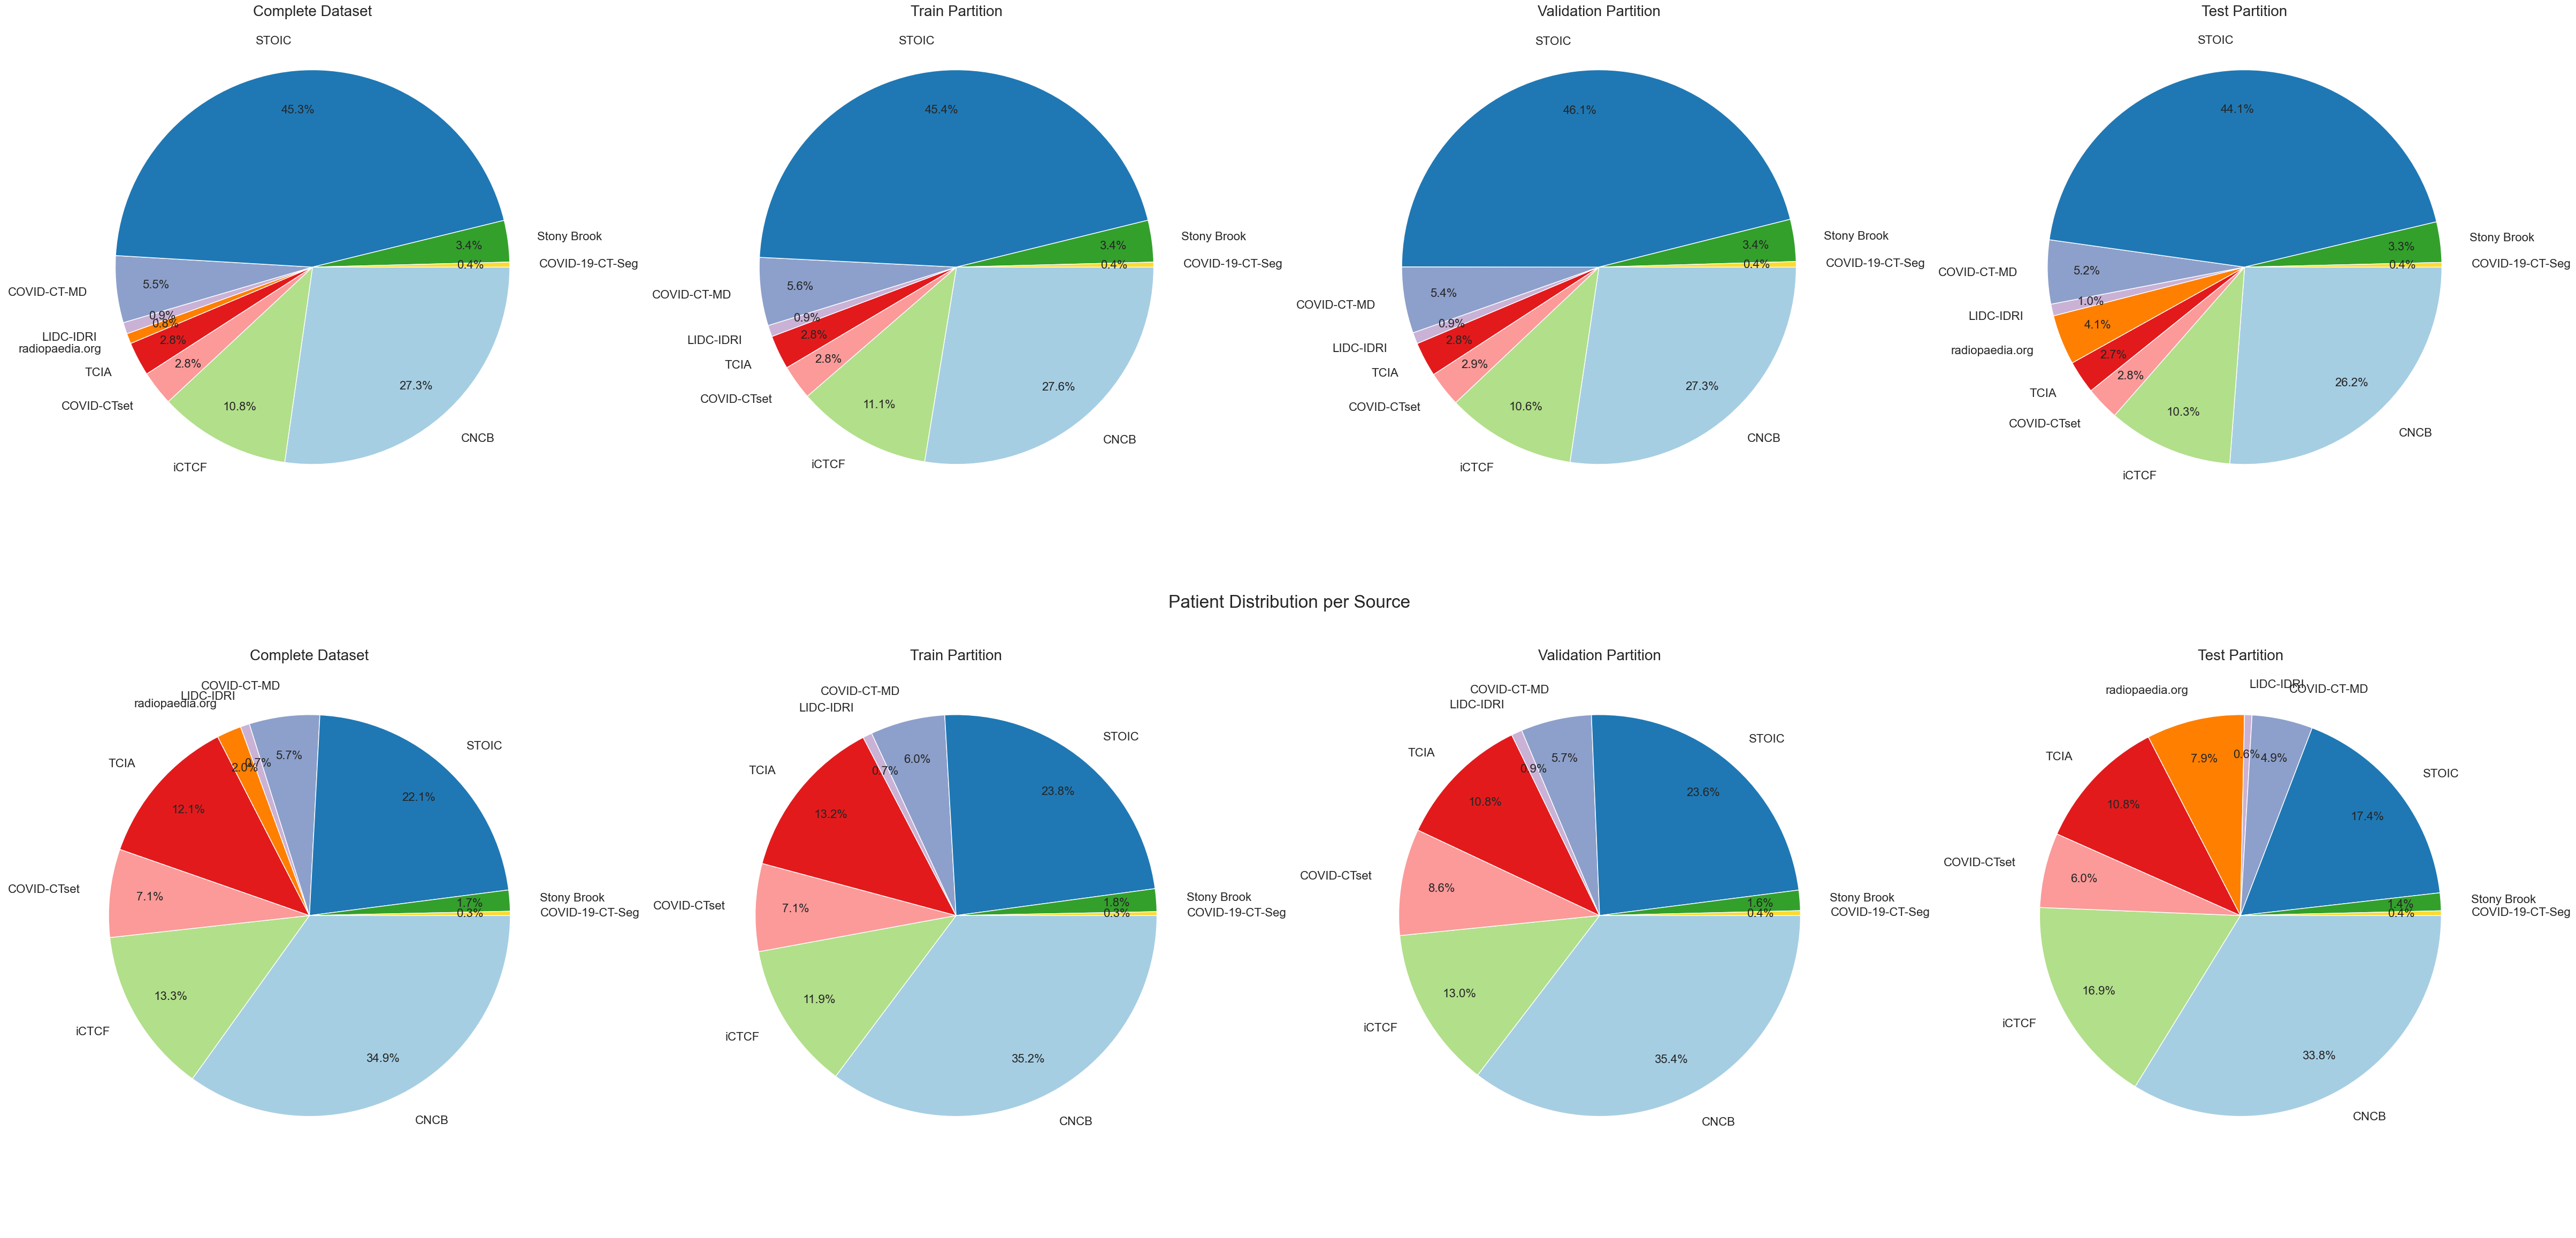

In [7]:
plot.column_as_pies( samples_df, patient_df, "source", dataset_name, figsize = (48, 24) )

In [8]:
plot.column_as_table( samples_df, patient_df, "source", dataset_name, bin_flag = False )

Sample Distribution
 by Source 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 STOIC 
 192361 
 115417 
 38472 
 38472 
 
 
 CNCB 
 115837 
 70142 
 22833 
 22862 
 
 
 iCTCF 
 45912 
 28116 
 8847 
 8949 
 
 
 COVID-CT-MD 
 23280 
 14187 
 4530 
 4563 
 
 
 Stony Brook 
 14461 
 8691 
 2880 
 2890 
 
 
 COVID-CTset 
 12058 
 7234 
 2413 
 2411 
 
 
 TCIA 
 11816 
 7094 
 2361 
 2361 
 
 
 LIDC-IDRI 
 3999 
 2380 
 778 
 841 
 
 
 radiopaedia.org 
 3574 
 0 
 0 
 3574 
 
 
 COVID-19-CT-Seg 
 1726 
 1022 
 375 
 329 
 
 
 SUM 
 425024 
 254283 
 83489 
 87252 
 
 
 Patient Distribution
 by Source 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 CNCB 
 1854 
 1038 
 367 
 449 
 
 
 STOIC 
 1176 
 700 
 245 
 231 
 
 
 iCTCF 
 709 
 350 
 135 
 224 
 
 
 TCIA 
 643 
 388 
 112 
 143 
 
 
 COVID-CTset 
 377 
 208 
 89 
 80 
 
 
 COVID-CT-MD 
 301 
 177 
 59 
 65 
 
 
 radiopaedia.org 
 105 
 0 
 0 
 105 
 
 
 Stony Brook 
 90 
 54 
 17 
 19 
 
 
 LIDC-IDRI 
 39 
 22 
 9 
 8 
 
 
 COVID-19-CT-Seg 
 18 
 9 
 4 
 5 
 
 
 SUM 
 5312 
 2946 
 1037 
 1329

## Partition

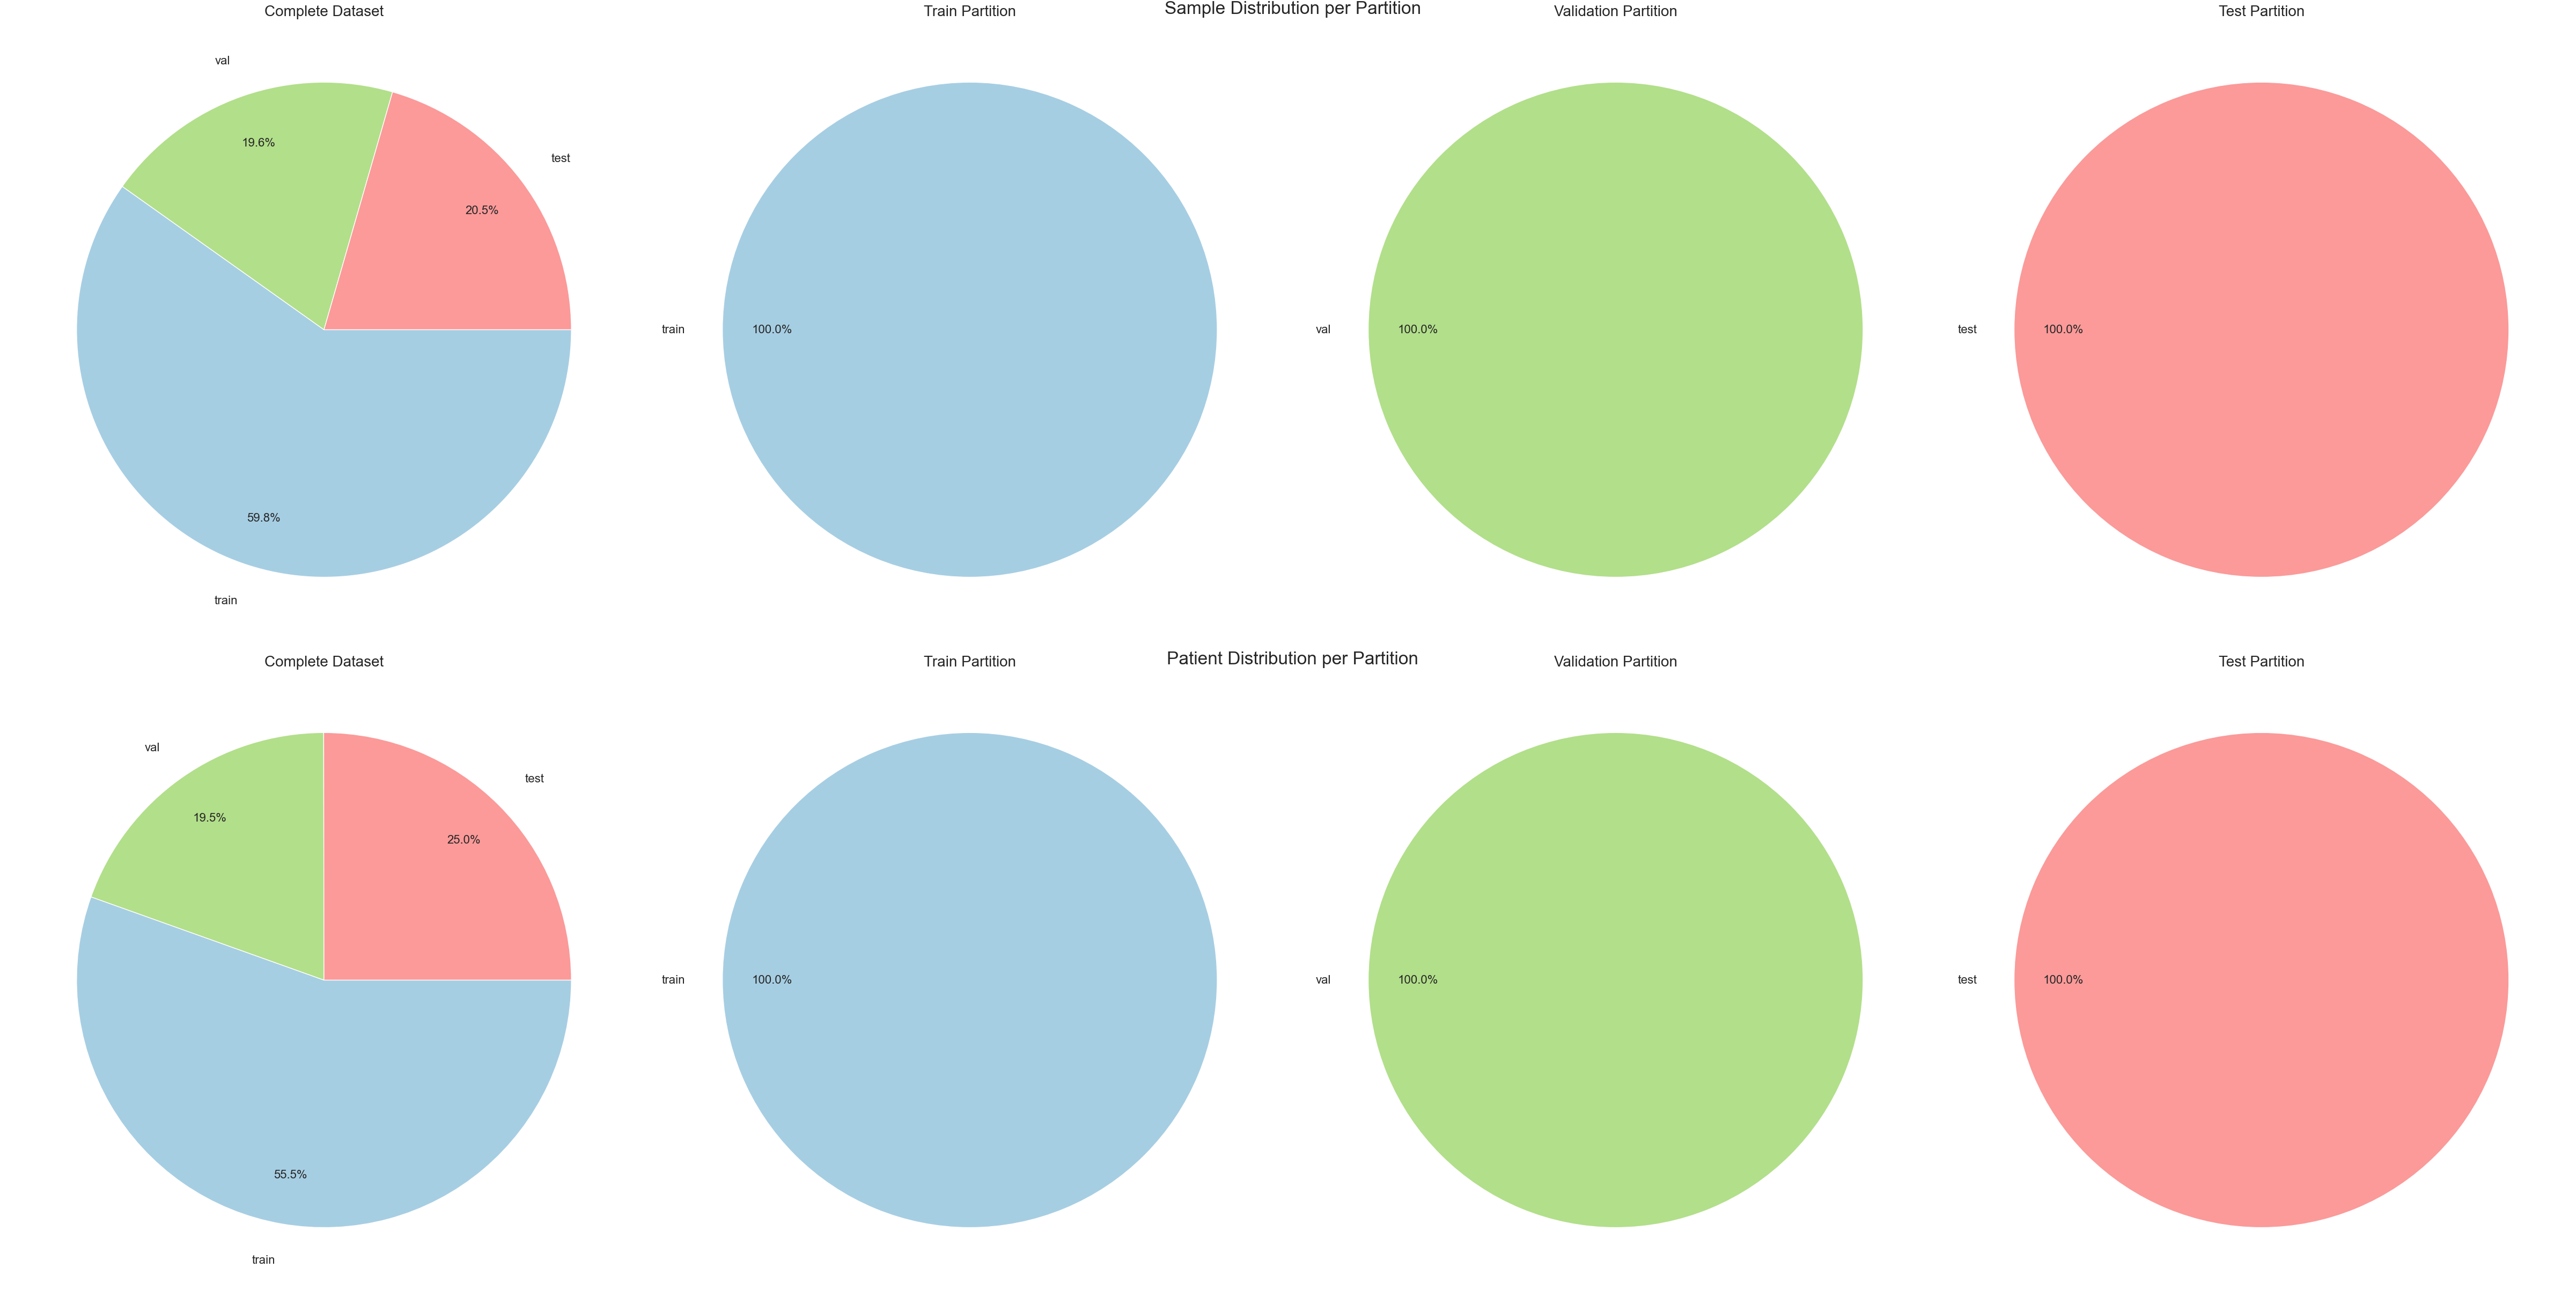

In [9]:
plot.column_as_pies( samples_df, patient_df, "partition", dataset_name, figsize = (48, 24) )

In [10]:
plot.column_as_table( samples_df, patient_df, "partition", dataset_name, bin_flag = False )

Sample Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 254283 
 254283 
 0 
 0 
 
 
 test 
 87252 
 0 
 0 
 87252 
 
 
 val 
 83489 
 0 
 83489 
 0 
 
 
 SUM 
 425024 
 254283 
 83489 
 87252 
 
 
 Patient Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 2946 
 2946 
 0 
 0 
 
 
 test 
 1329 
 0 
 0 
 1329 
 
 
 val 
 1037 
 0 
 1037 
 0 
 
 
 SUM 
 5312 
 2946 
 1037 
 1329

## Class

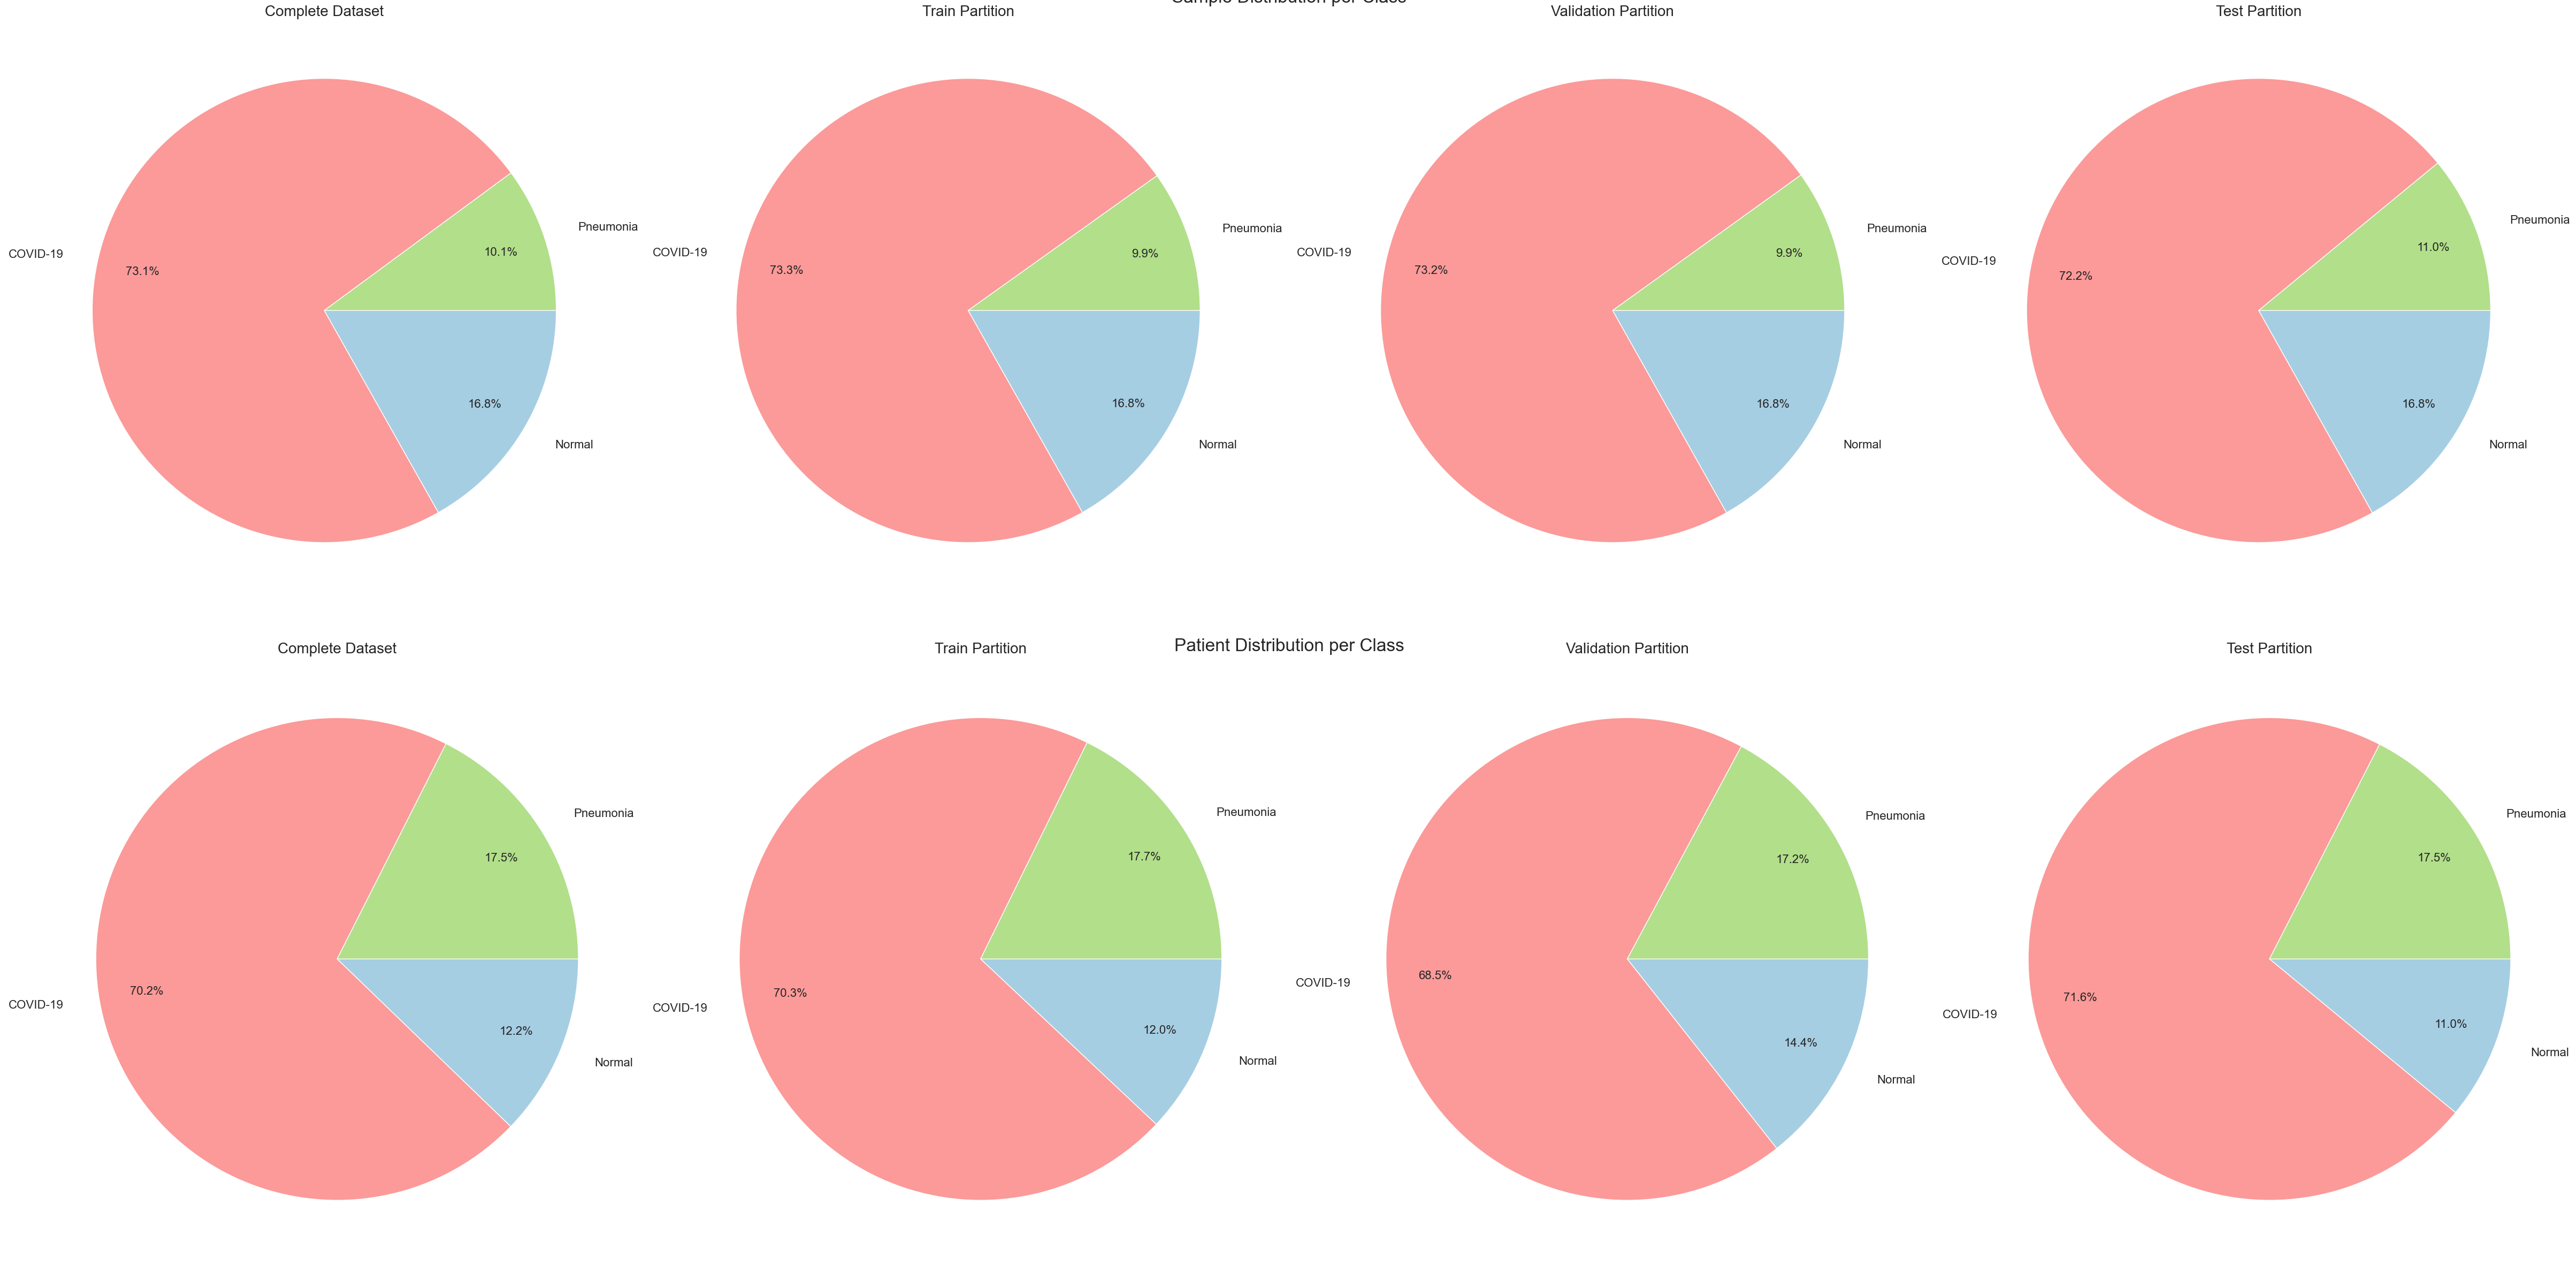

In [11]:
plot.column_as_pies( samples_df, patient_df, "class", dataset_name, figsize = (48, 24) )

In [12]:
plot.column_as_table( samples_df, patient_df, "class", dataset_name, bin_flag = False )

Sample Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 310593 
 186461 
 61144 
 62988 
 
 
 Normal 
 71488 
 42730 
 14058 
 14700 
 
 
 Pneumonia 
 42943 
 25092 
 8287 
 9564 
 
 
 SUM 
 425024 
 254283 
 83489 
 87252 
 
 
 Patient Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 3731 
 2070 
 710 
 951 
 
 
 Pneumonia 
 932 
 522 
 178 
 232 
 
 
 Normal 
 649 
 354 
 149 
 146 
 
 
 SUM 
 5312 
 2946 
 1037 
 1329

## Country

In [13]:
np.unique(samples_df["country"].to_list())

array(['Afghanistan', 'Algeria', 'Australia', 'Azerbaijan', 'Belgium',
       'China', 'England', 'France', 'Iran', 'Italy', 'Lebanon', 'N/A',
       'Peru', 'Scotland', 'Turkey', 'USA', 'Ukraine'], dtype='<U11')

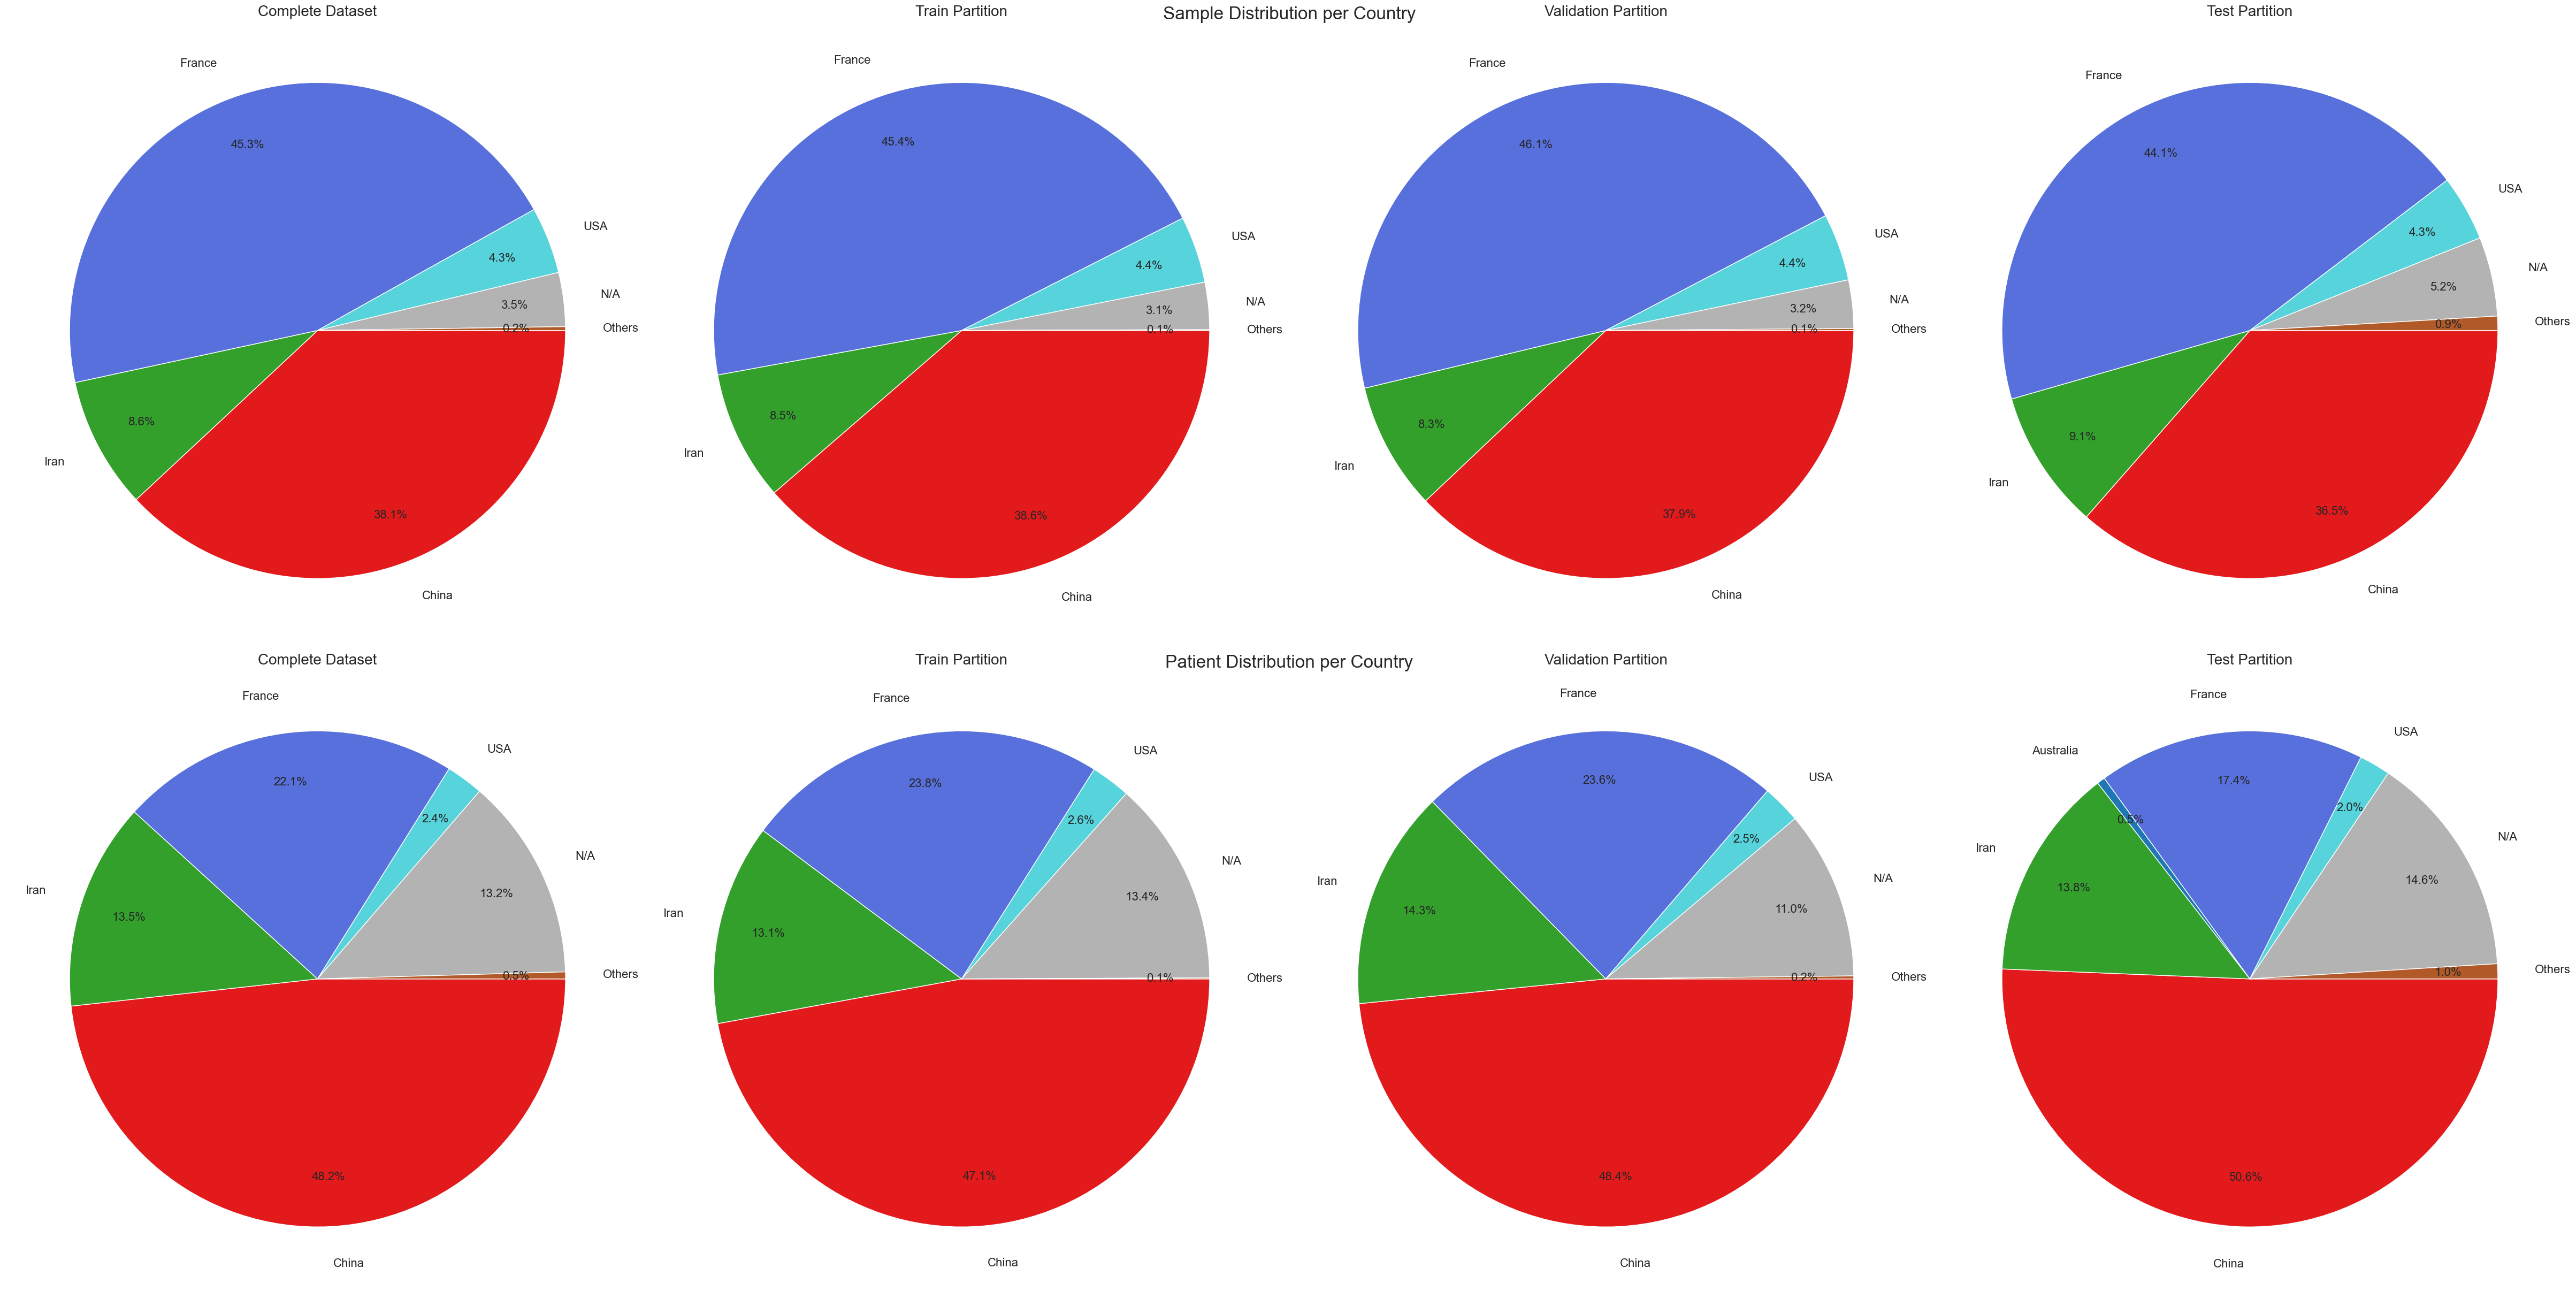

In [14]:
plot.column_as_pies( samples_df, patient_df, "country", dataset_name, figsize = (48, 24) )

In [15]:
plot.column_as_table( samples_df, patient_df, "country", dataset_name, bin_flag = False )

Sample Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 France 
 192361 
 115417 
 38472 
 38472 
 
 
 China 
 161749 
 98258 
 31680 
 31811 
 
 
 Iran 
 36452 
 21582 
 6943 
 7927 
 
 
 USA 
 18460 
 11071 
 3658 
 3731 
 
 
 N/A 
 14947 
 7813 
 2631 
 4503 
 
 
 Australia 
 287 
 0 
 0 
 287 
 
 
 Italy 
 240 
 101 
 0 
 139 
 
 
 Algeria 
 109 
 0 
 0 
 109 
 
 
 Belgium 
 72 
 0 
 72 
 0 
 
 
 England 
 72 
 0 
 0 
 72 
 
 
 Scotland 
 71 
 0 
 0 
 71 
 
 
 Turkey 
 41 
 41 
 0 
 0 
 
 
 Azerbaijan 
 39 
 0 
 0 
 39 
 
 
 Lebanon 
 33 
 0 
 0 
 33 
 
 
 Ukraine 
 33 
 0 
 33 
 0 
 
 
 Afghanistan 
 29 
 0 
 0 
 29 
 
 
 Peru 
 29 
 0 
 0 
 29 
 
 
 SUM 
 425024 
 254283 
 83489 
 87252 
 
 
 Patient Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 China 
 2563 
 1388 
 502 
 673 
 
 
 France 
 1176 
 700 
 245 
 231 
 
 
 Iran 
 718 
 386 
 148 
 184 
 
 
 N/A 
 702 
 394 
 114 
 194 
 
 
 USA 
 129 
 76 
 26 
 27 
 
 
 Australia 
 7 
 0 
 0 
 7 
 
 
 Algeria 
 5 
 0 
 0 
 5 
 
 
 Italy 
 3 
 1 
 0 
 2 
 
 
 Afghanistan 
 1 
 0 
 0 
 1 
 
 
 Azerbaijan 
 1 
 0 
 0 
 1 
 
 
 Belgium 
 1 
 0 
 1 
 0 
 
 
 England 
 1 
 0 
 0 
 1 
 
 
 Lebanon 
 1 
 0 
 0 
 1 
 
 
 Peru 
 1 
 0 
 0 
 1 
 
 
 Scotland 
 1 
 0 
 0 
 1 
 
 
 Turkey 
 1 
 1 
 0 
 0 
 
 
 Ukraine 
 1 
 0 
 1 
 0 
 
 
 SUM 
 5312 
 2946 
 1037 
 1329

## Age

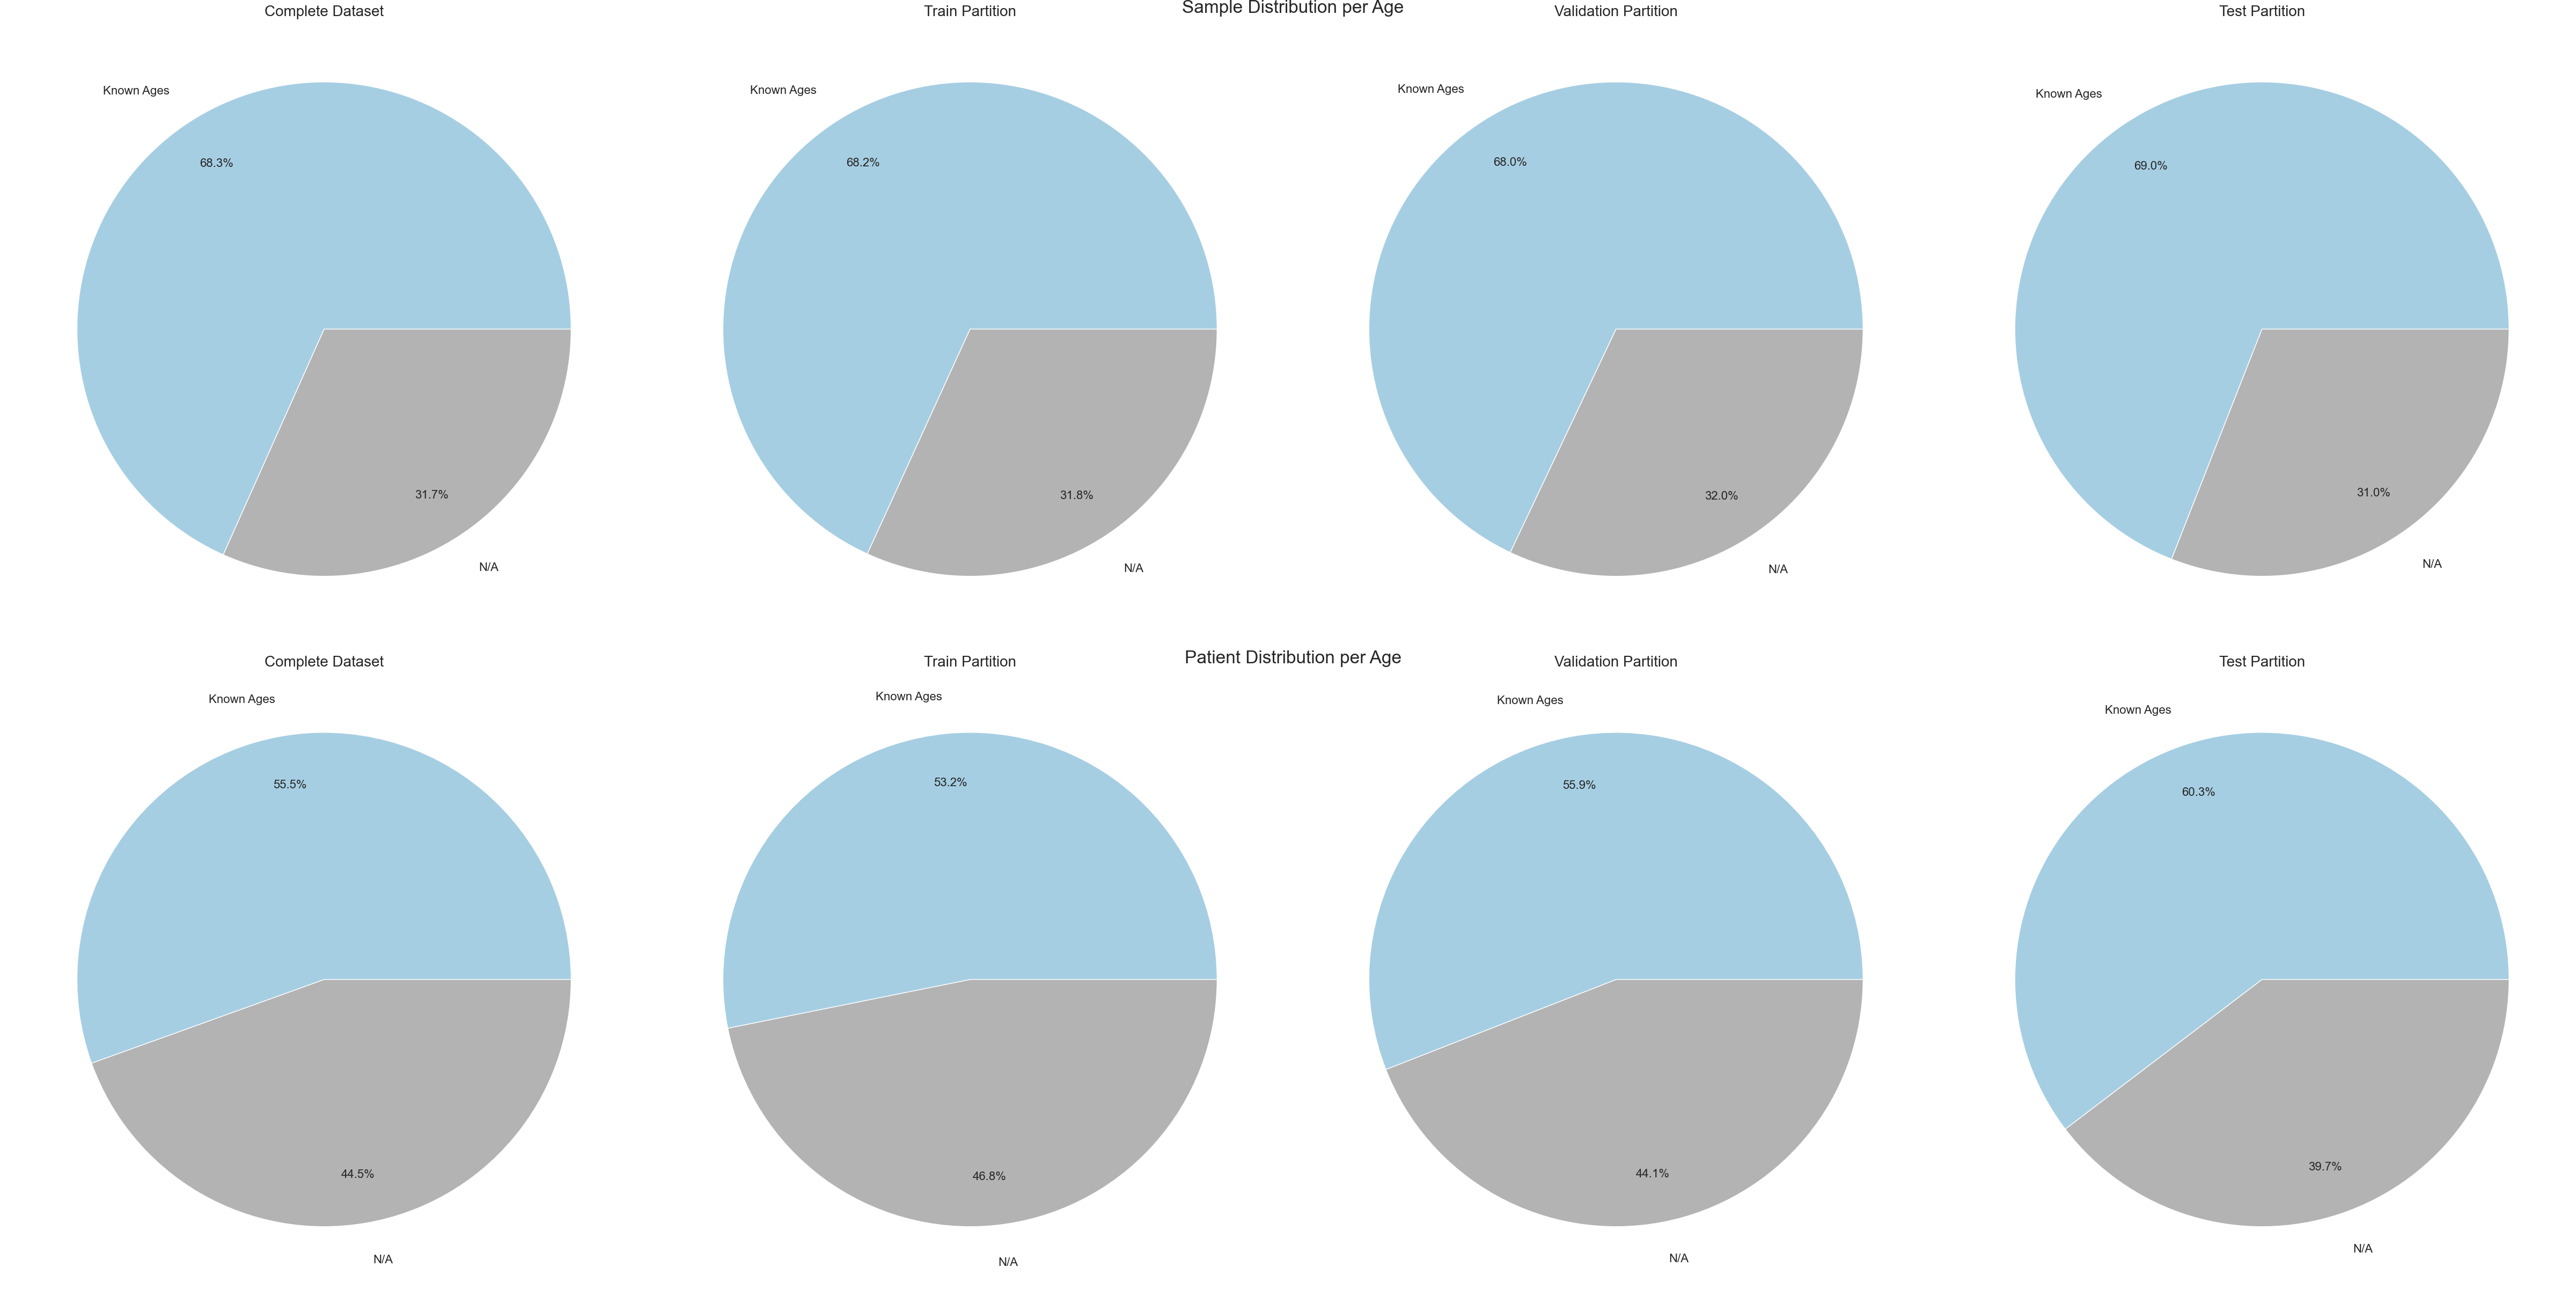

In [16]:
plot.column_as_pies( samples_df, patient_df, "age", dataset_name, figsize = (48, 24))

In [17]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = False )

Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 134694 
 80928 
 26749 
 27017 
 
 
 Known Ages 
 290330 
 173355 
 56740 
 60235 
 
 
 SUM 
 425024 
 254283 
 83489 
 87252 
 
 
 Patient Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 2364 
 1380 
 457 
 527 
 
 
 Known Ages 
 2948 
 1566 
 580 
 802 
 
 
 SUM 
 5312 
 2946 
 1037 
 1329

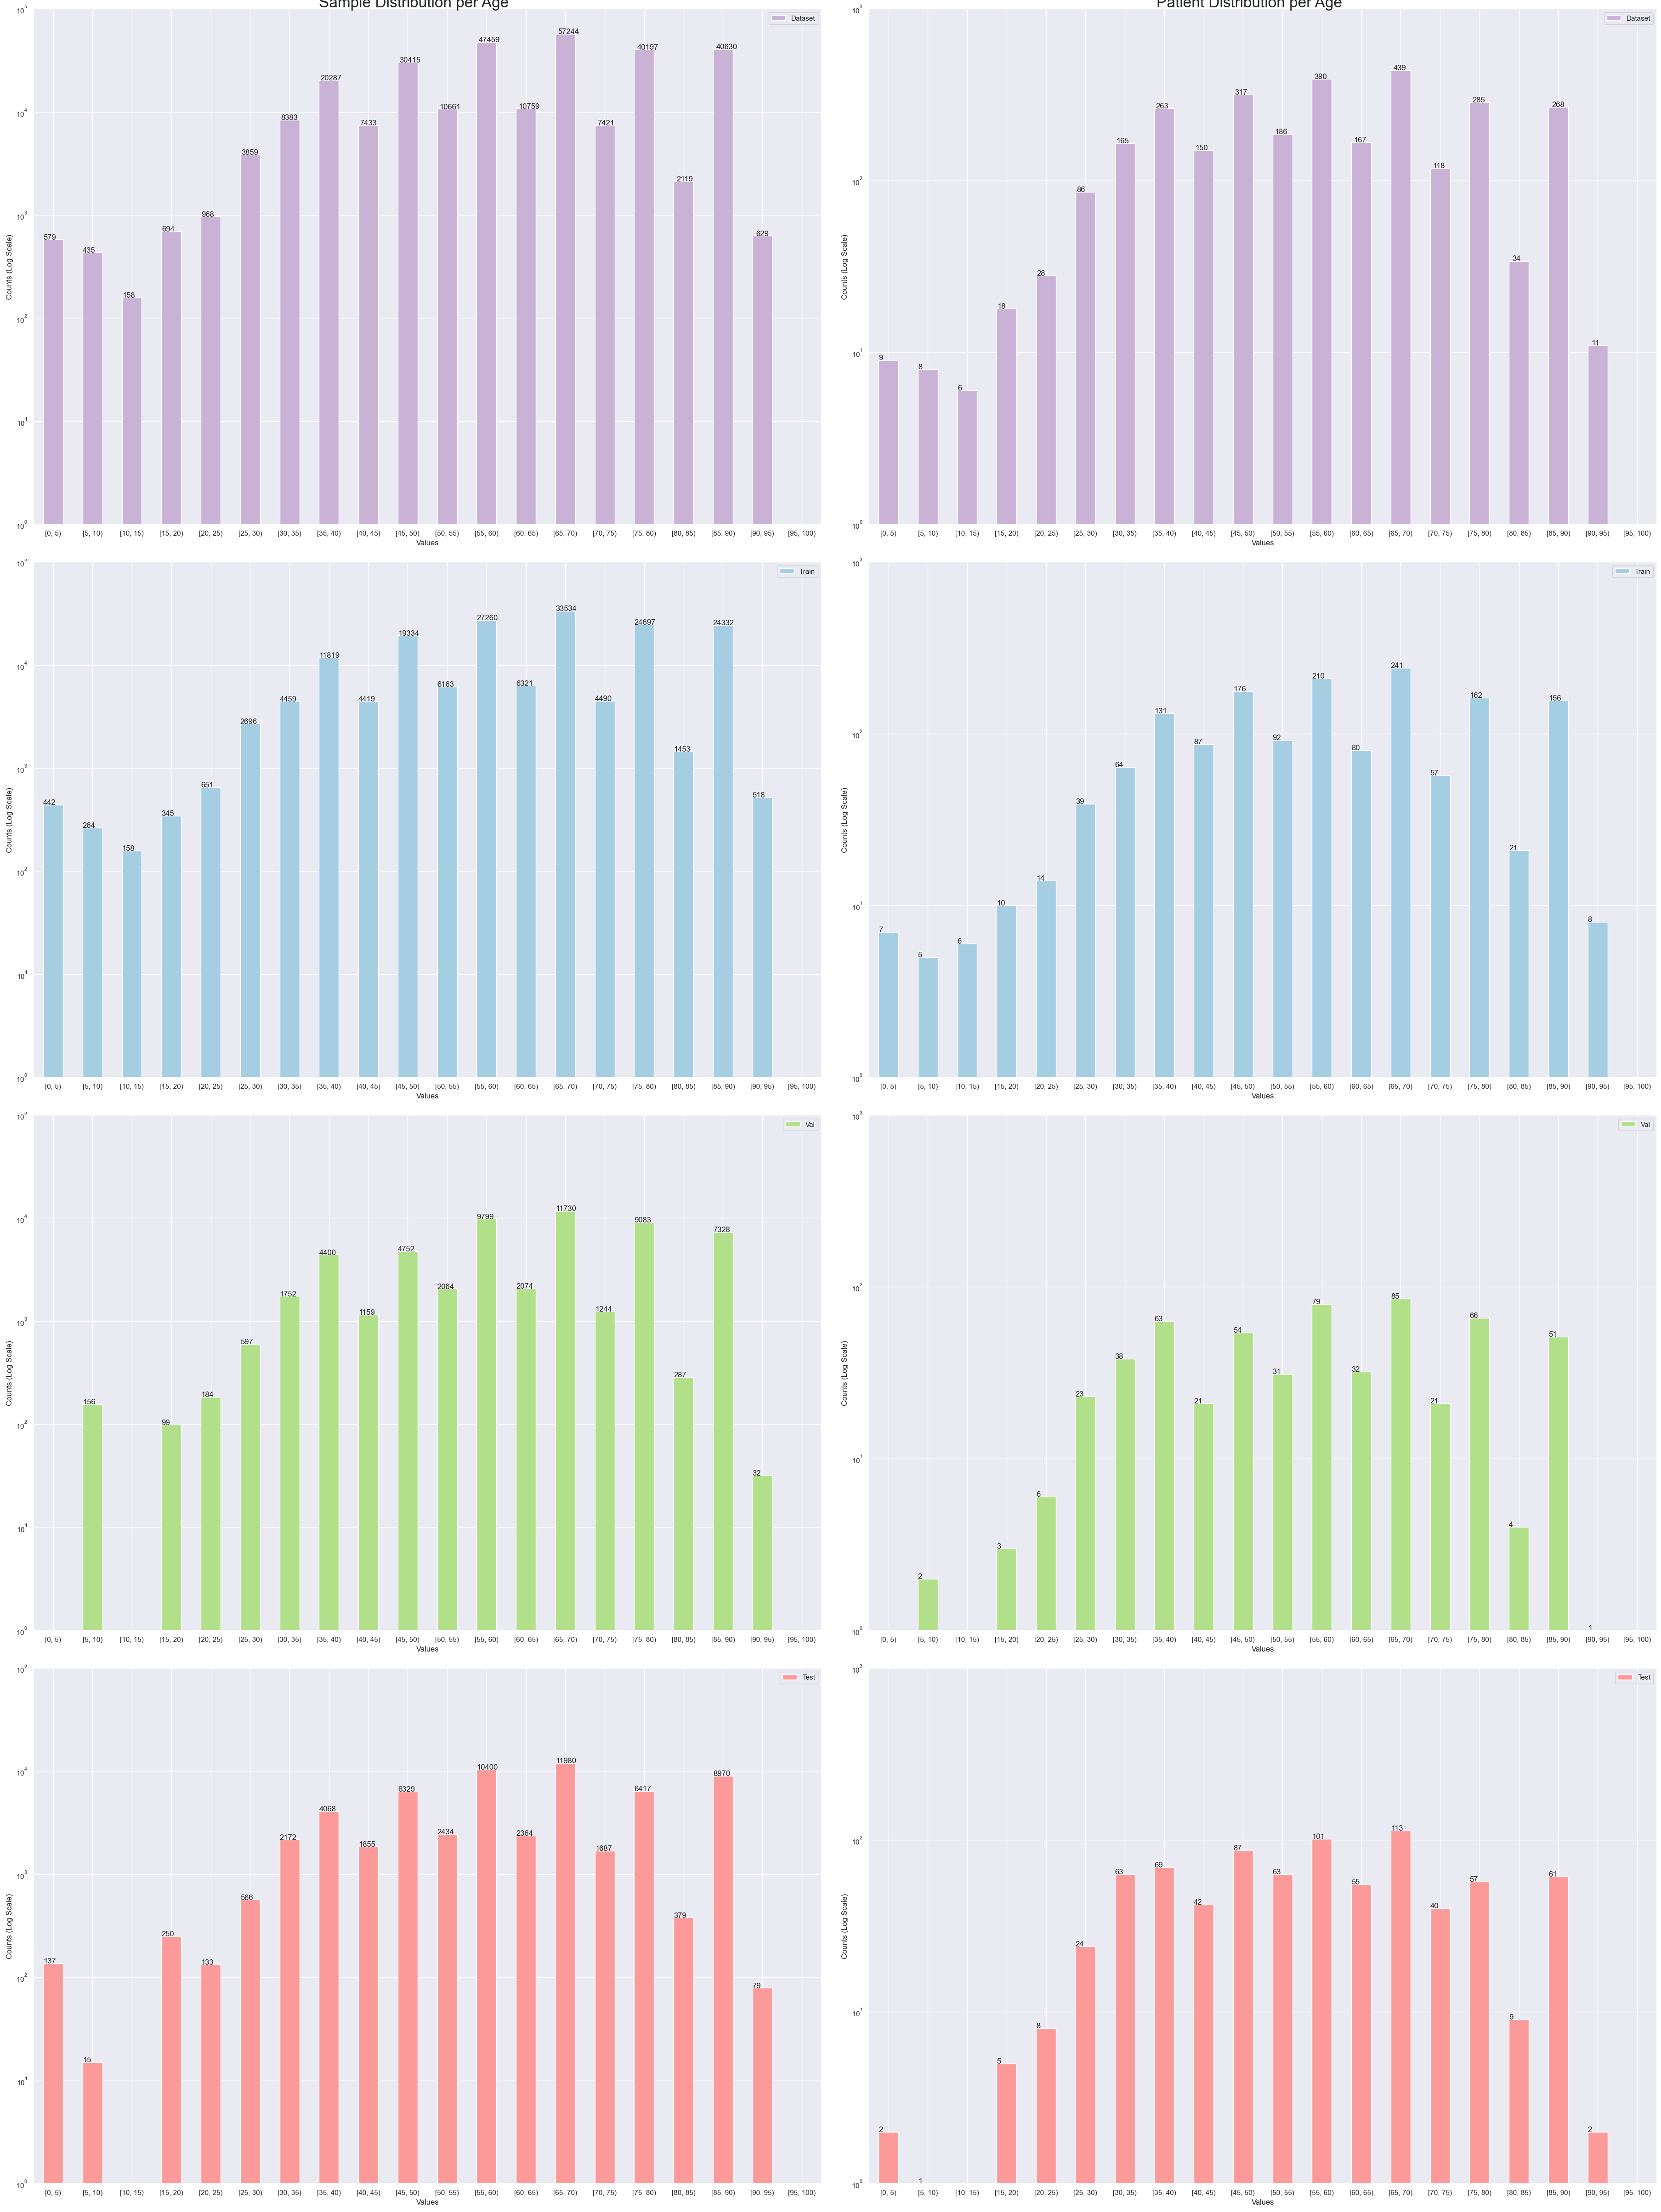

In [18]:
plot.column_as_histograms( samples_df, patient_df, "age", dataset_name, figsize = (36, 48))

In [19]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = True )

Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 579 
 442 
 0 
 137 
 
 
 [5, 10) 
 435 
 264 
 156 
 15 
 
 
 [10, 15) 
 158 
 158 
 0 
 0 
 
 
 [15, 20) 
 694 
 345 
 99 
 250 
 
 
 [20, 25) 
 968 
 651 
 184 
 133 
 
 
 [25, 30) 
 3859 
 2696 
 597 
 566 
 
 
 [30, 35) 
 8383 
 4459 
 1752 
 2172 
 
 
 [35, 40) 
 20287 
 11819 
 4400 
 4068 
 
 
 [40, 45) 
 7433 
 4419 
 1159 
 1855 
 
 
 [45, 50) 
 30415 
 19334 
 4752 
 6329 
 
 
 [50, 55) 
 10661 
 6163 
 2064 
 2434 
 
 
 [55, 60) 
 47459 
 27260 
 9799 
 10400 
 
 
 [60, 65) 
 10759 
 6321 
 2074 
 2364 
 
 
 [65, 70) 
 57244 
 33534 
 11730 
 11980 
 
 
 [70, 75) 
 7421 
 4490 
 1244 
 1687 
 
 
 [75, 80) 
 40197 
 24697 
 9083 
 6417 
 
 
 [80, 85) 
 2119 
 1453 
 287 
 379 
 
 
 [85, 90) 
 40630 
 24332 
 7328 
 8970 
 
 
 [90, 95) 
 629 
 518 
 32 
 79 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 290330 
 173355 
 56740 
 60235 
 
 
 Patient Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 9 
 7 
 0 
 2 
 
 
 [5, 10) 
 8 
 5 
 2 
 1 
 
 
 [10, 15) 
 6 
 6 
 0 
 0 
 
 
 [15, 20) 
 18 
 10 
 3 
 5 
 
 
 [20, 25) 
 28 
 14 
 6 
 8 
 
 
 [25, 30) 
 86 
 39 
 23 
 24 
 
 
 [30, 35) 
 165 
 64 
 38 
 63 
 
 
 [35, 40) 
 263 
 131 
 63 
 69 
 
 
 [40, 45) 
 150 
 87 
 21 
 42 
 
 
 [45, 50) 
 317 
 176 
 54 
 87 
 
 
 [50, 55) 
 186 
 92 
 31 
 63 
 
 
 [55, 60) 
 390 
 210 
 79 
 101 
 
 
 [60, 65) 
 167 
 80 
 32 
 55 
 
 
 [65, 70) 
 439 
 241 
 85 
 113 
 
 
 [70, 75) 
 118 
 57 
 21 
 40 
 
 
 [75, 80) 
 285 
 162 
 66 
 57 
 
 
 [80, 85) 
 34 
 21 
 4 
 9 
 
 
 [85, 90) 
 268 
 156 
 51 
 61 
 
 
 [90, 95) 
 11 
 8 
 1 
 2 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 2948 
 1566 
 580 
 802

## Sex

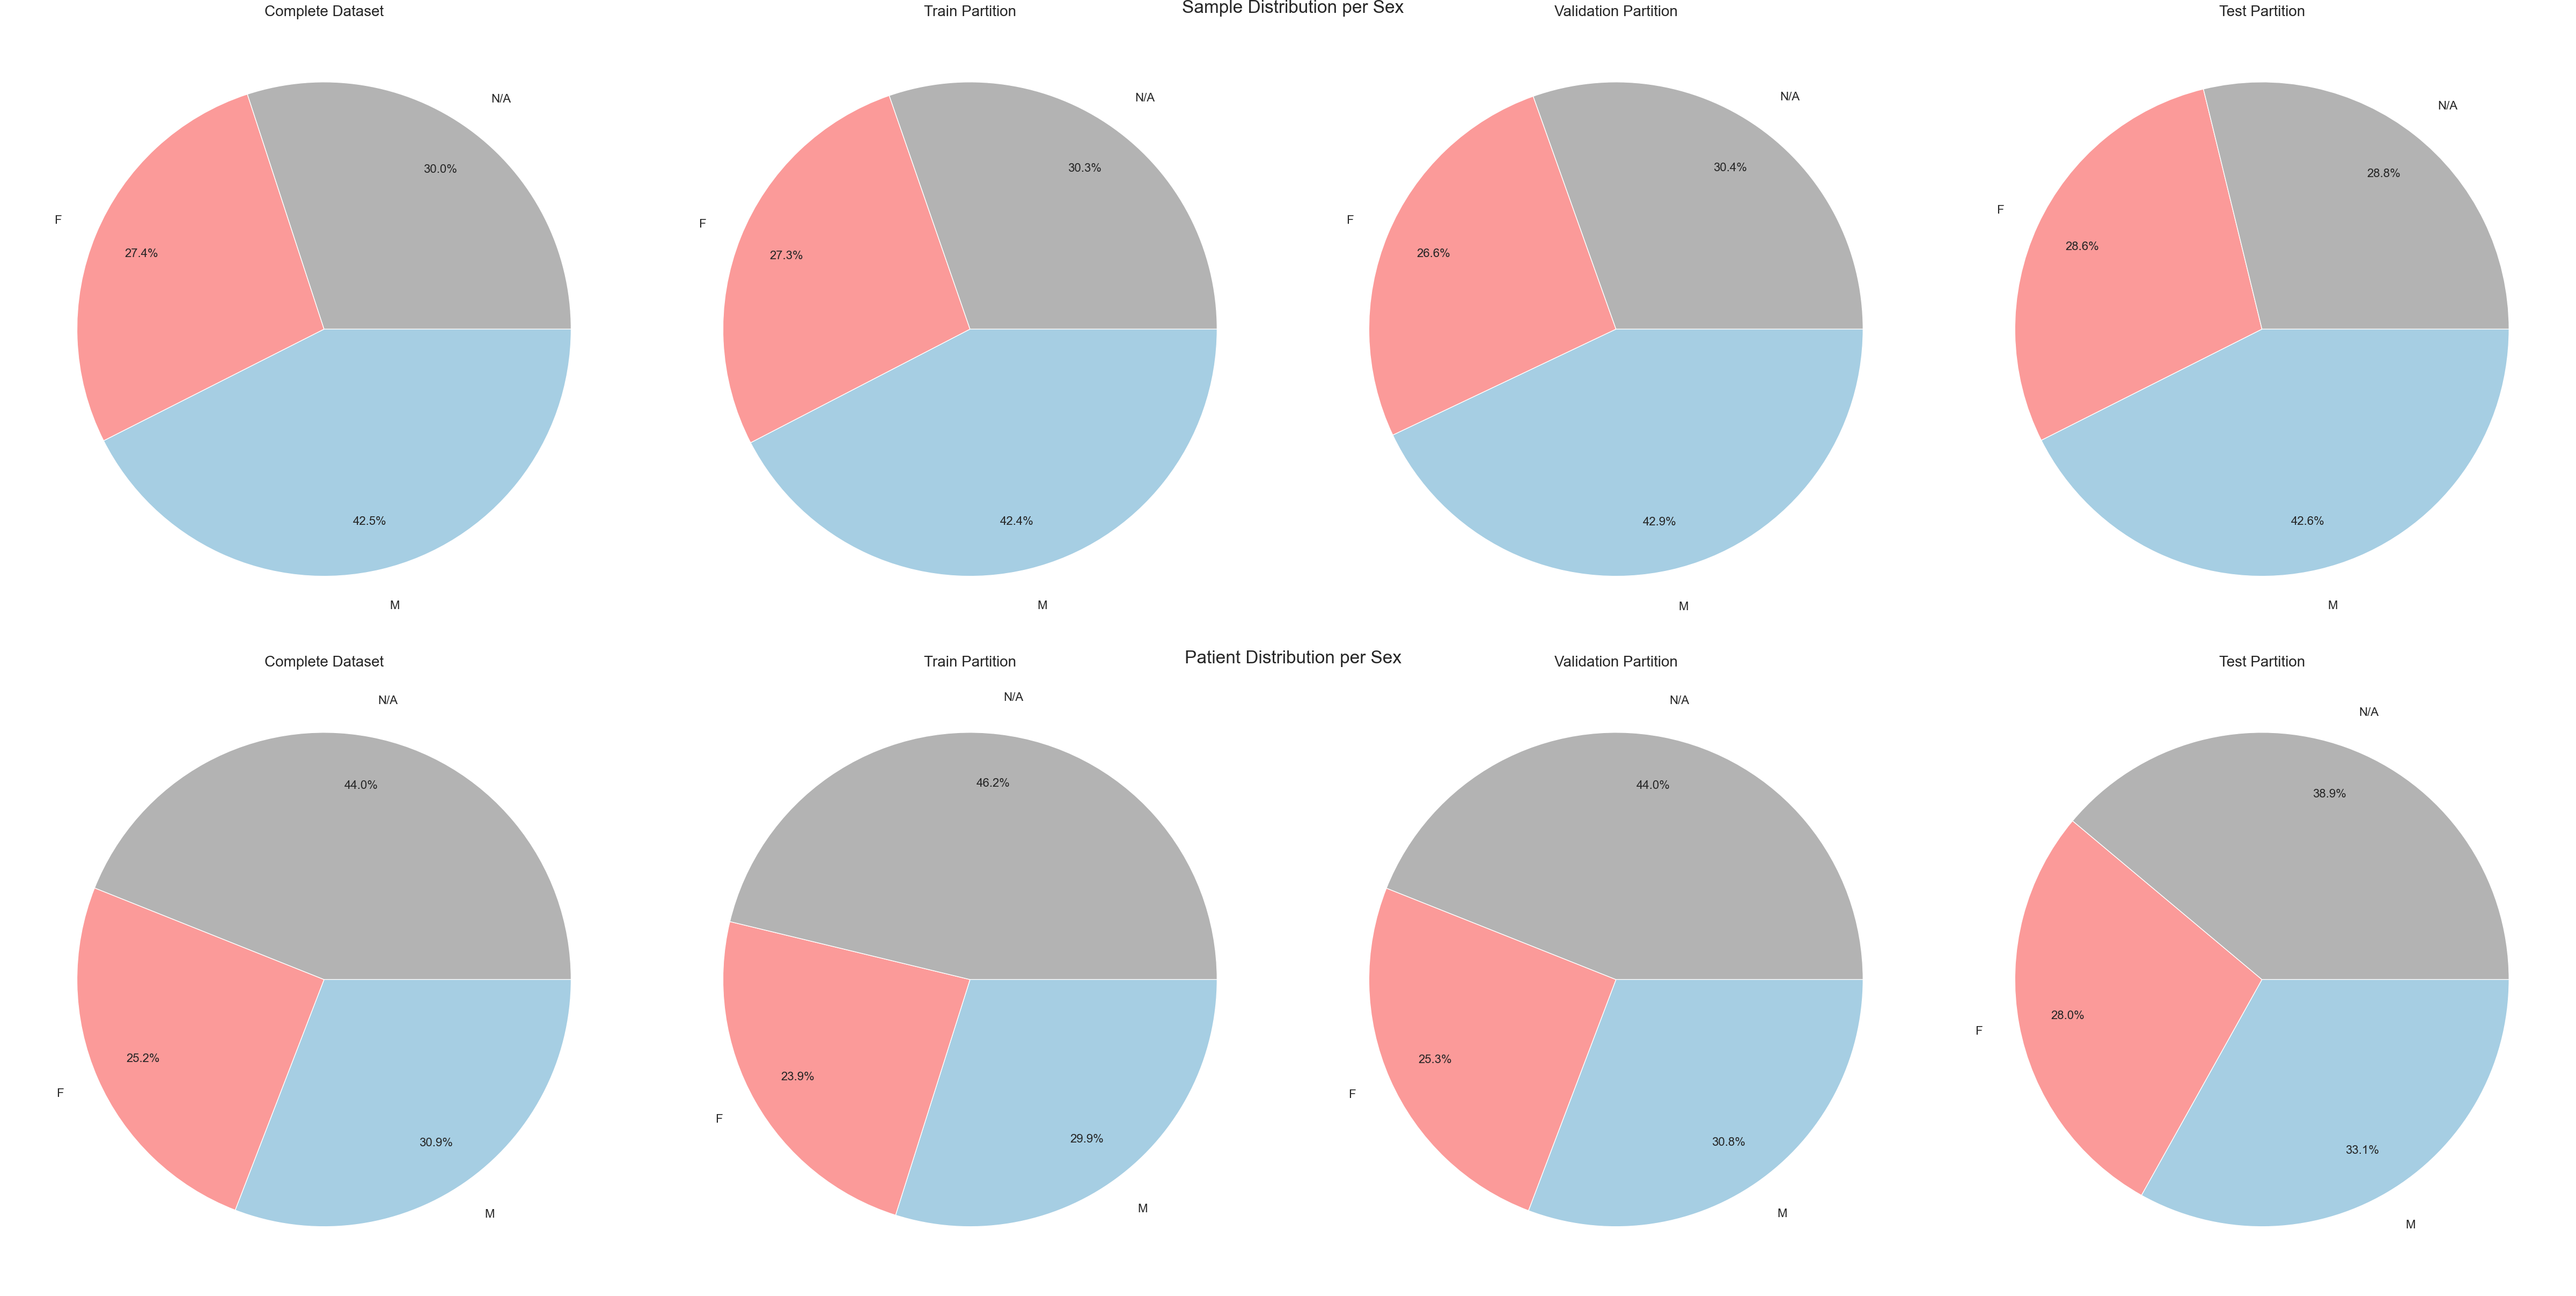

In [20]:
plot.column_as_pies( samples_df, patient_df, "sex", dataset_name, figsize = (48, 24) )

In [21]:
plot.column_as_table( samples_df, patient_df, "sex", dataset_name, bin_flag = False )

Sample Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 M 
 180817 
 107813 
 35857 
 37147 
 
 
 N/A 
 127602 
 77054 
 25413 
 25135 
 
 
 F 
 116605 
 69416 
 22219 
 24970 
 
 
 SUM 
 425024 
 254283 
 83489 
 87252 
 
 
 Patient Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 2335 
 1362 
 456 
 517 
 
 
 M 
 1639 
 880 
 319 
 440 
 
 
 F 
 1338 
 704 
 262 
 372 
 
 
 SUM 
 5312 
 2946 
 1037 
 1329

## Slice Selection

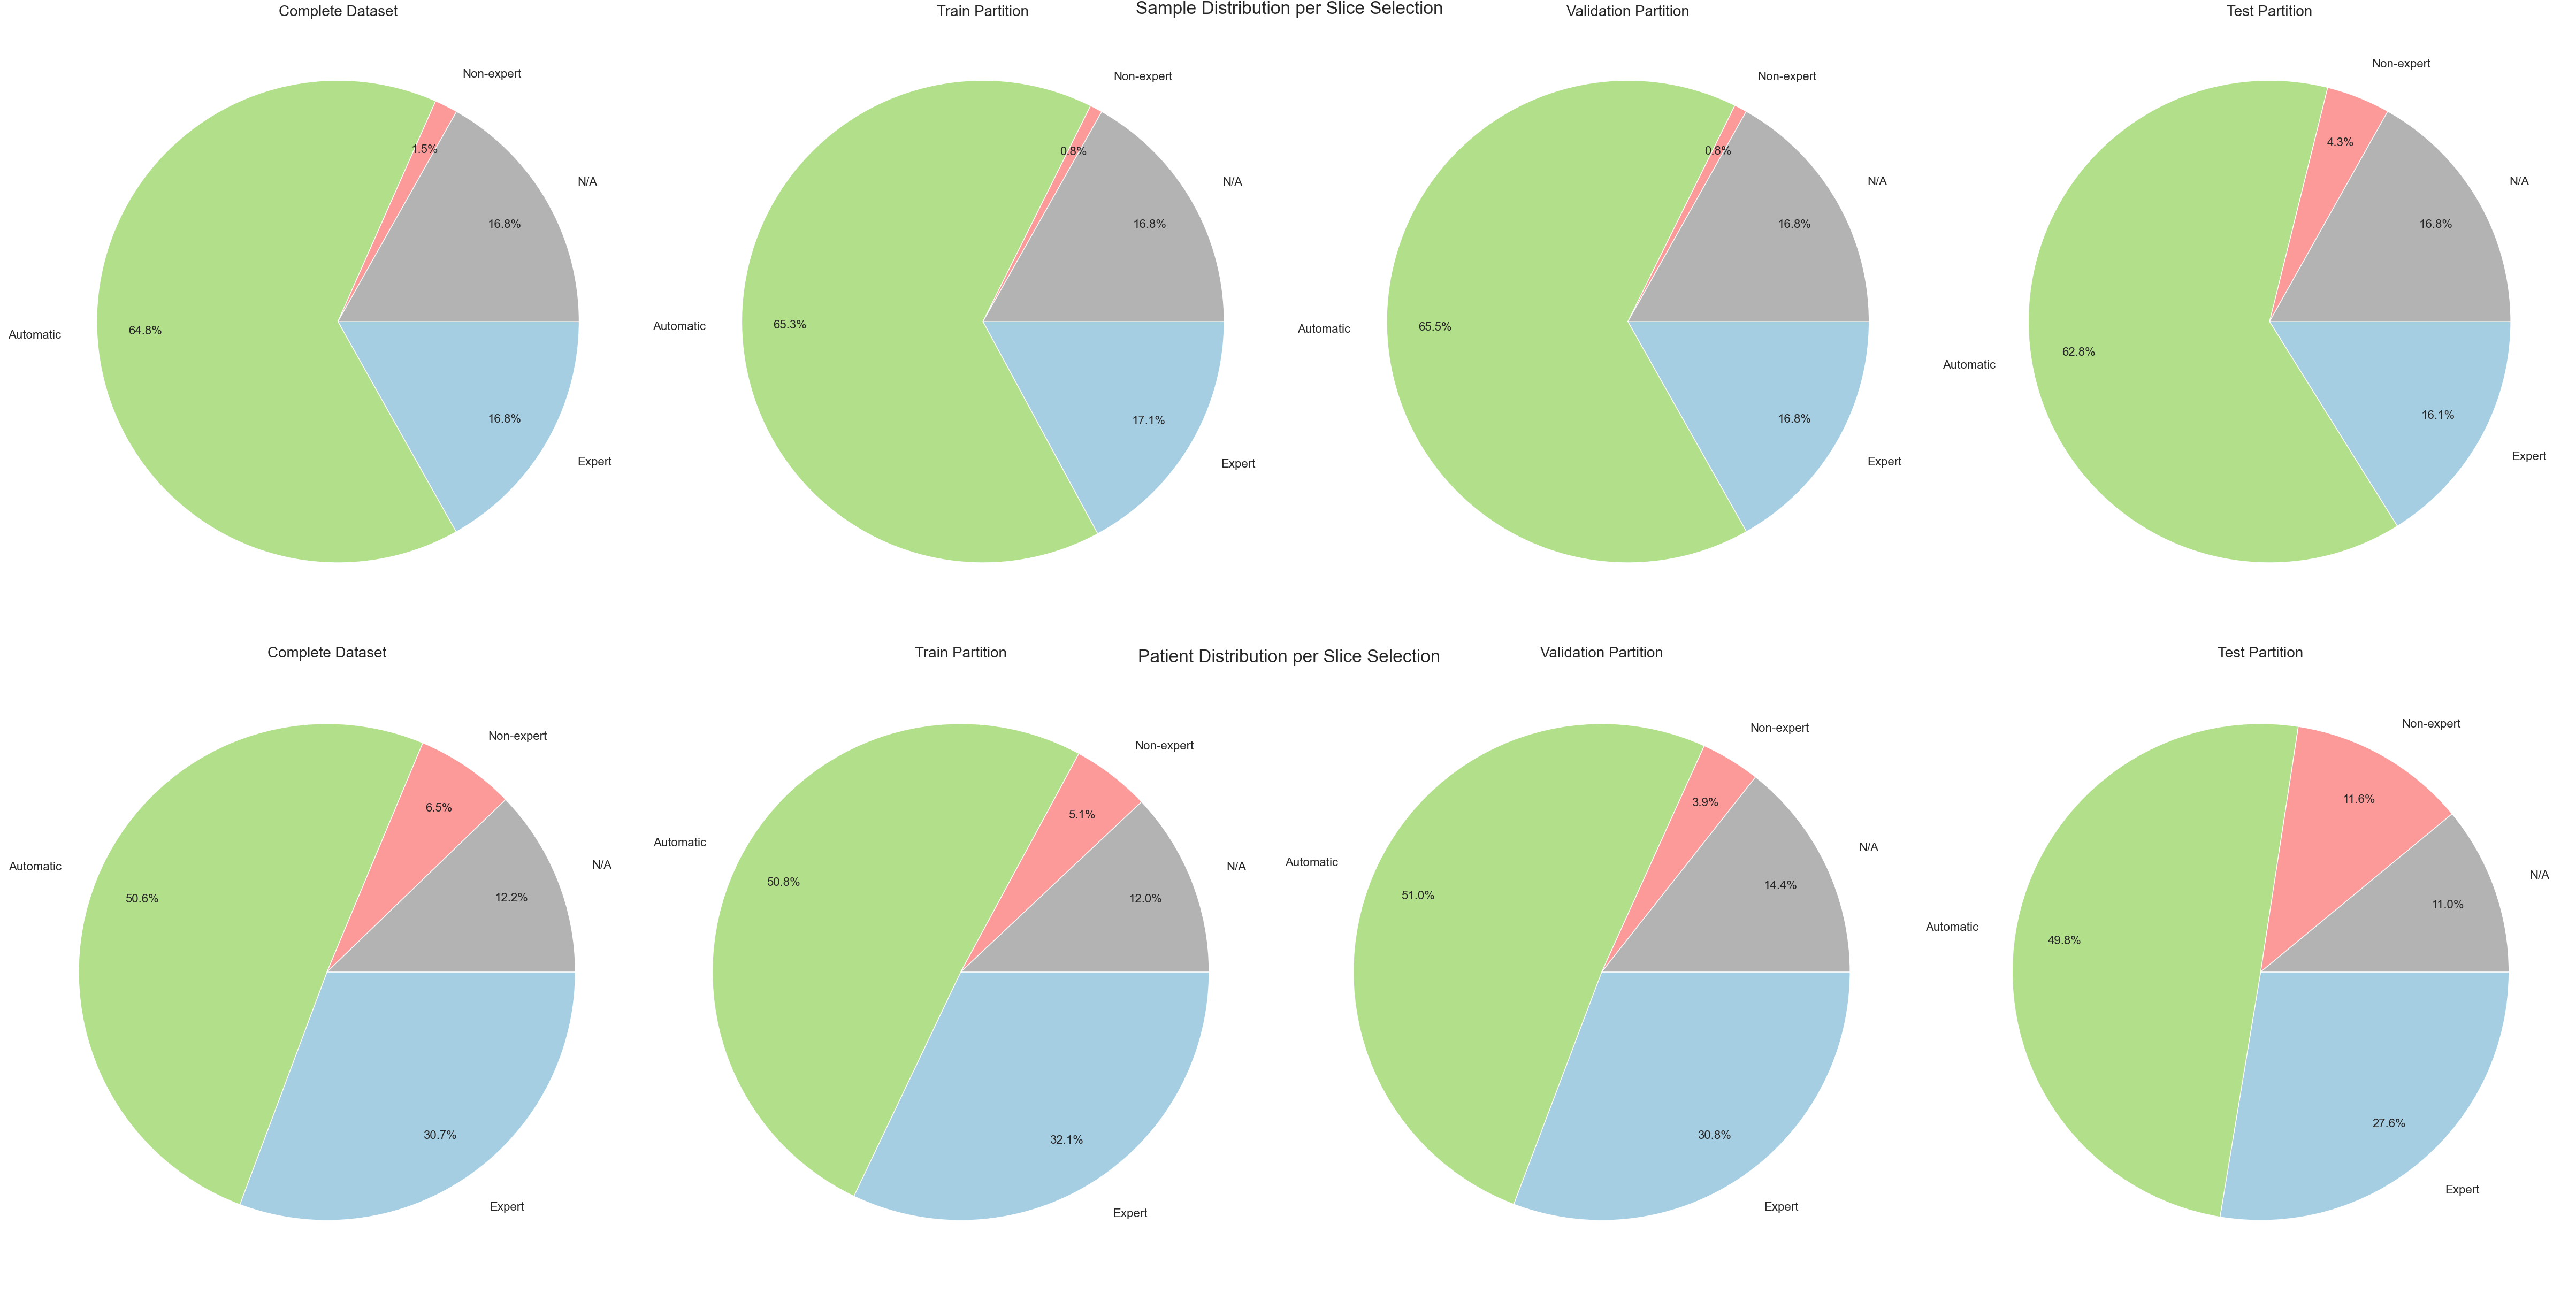

In [22]:
plot.column_as_pies( samples_df, patient_df, "slice_selection", dataset_name, figsize = (48, 24) )

In [23]:
plot.column_as_table( samples_df, patient_df, "slice_selection", dataset_name, bin_flag = False )

Sample Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 275366 
 165925 
 54679 
 54762 
 
 
 Expert 
 71615 
 43509 
 14046 
 14060 
 
 
 N/A 
 71488 
 42730 
 14058 
 14700 
 
 
 Non-expert 
 6555 
 2119 
 706 
 3730 
 
 
 SUM 
 425024 
 254283 
 83489 
 87252 
 
 
 Patient Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 2688 
 1497 
 529 
 662 
 
 
 Expert 
 1631 
 945 
 319 
 367 
 
 
 N/A 
 649 
 354 
 149 
 146 
 
 
 Non-expert 
 344 
 150 
 40 
 154 
 
 
 SUM 
 5312 
 2946 
 1037 
 1329

## Verified Findings

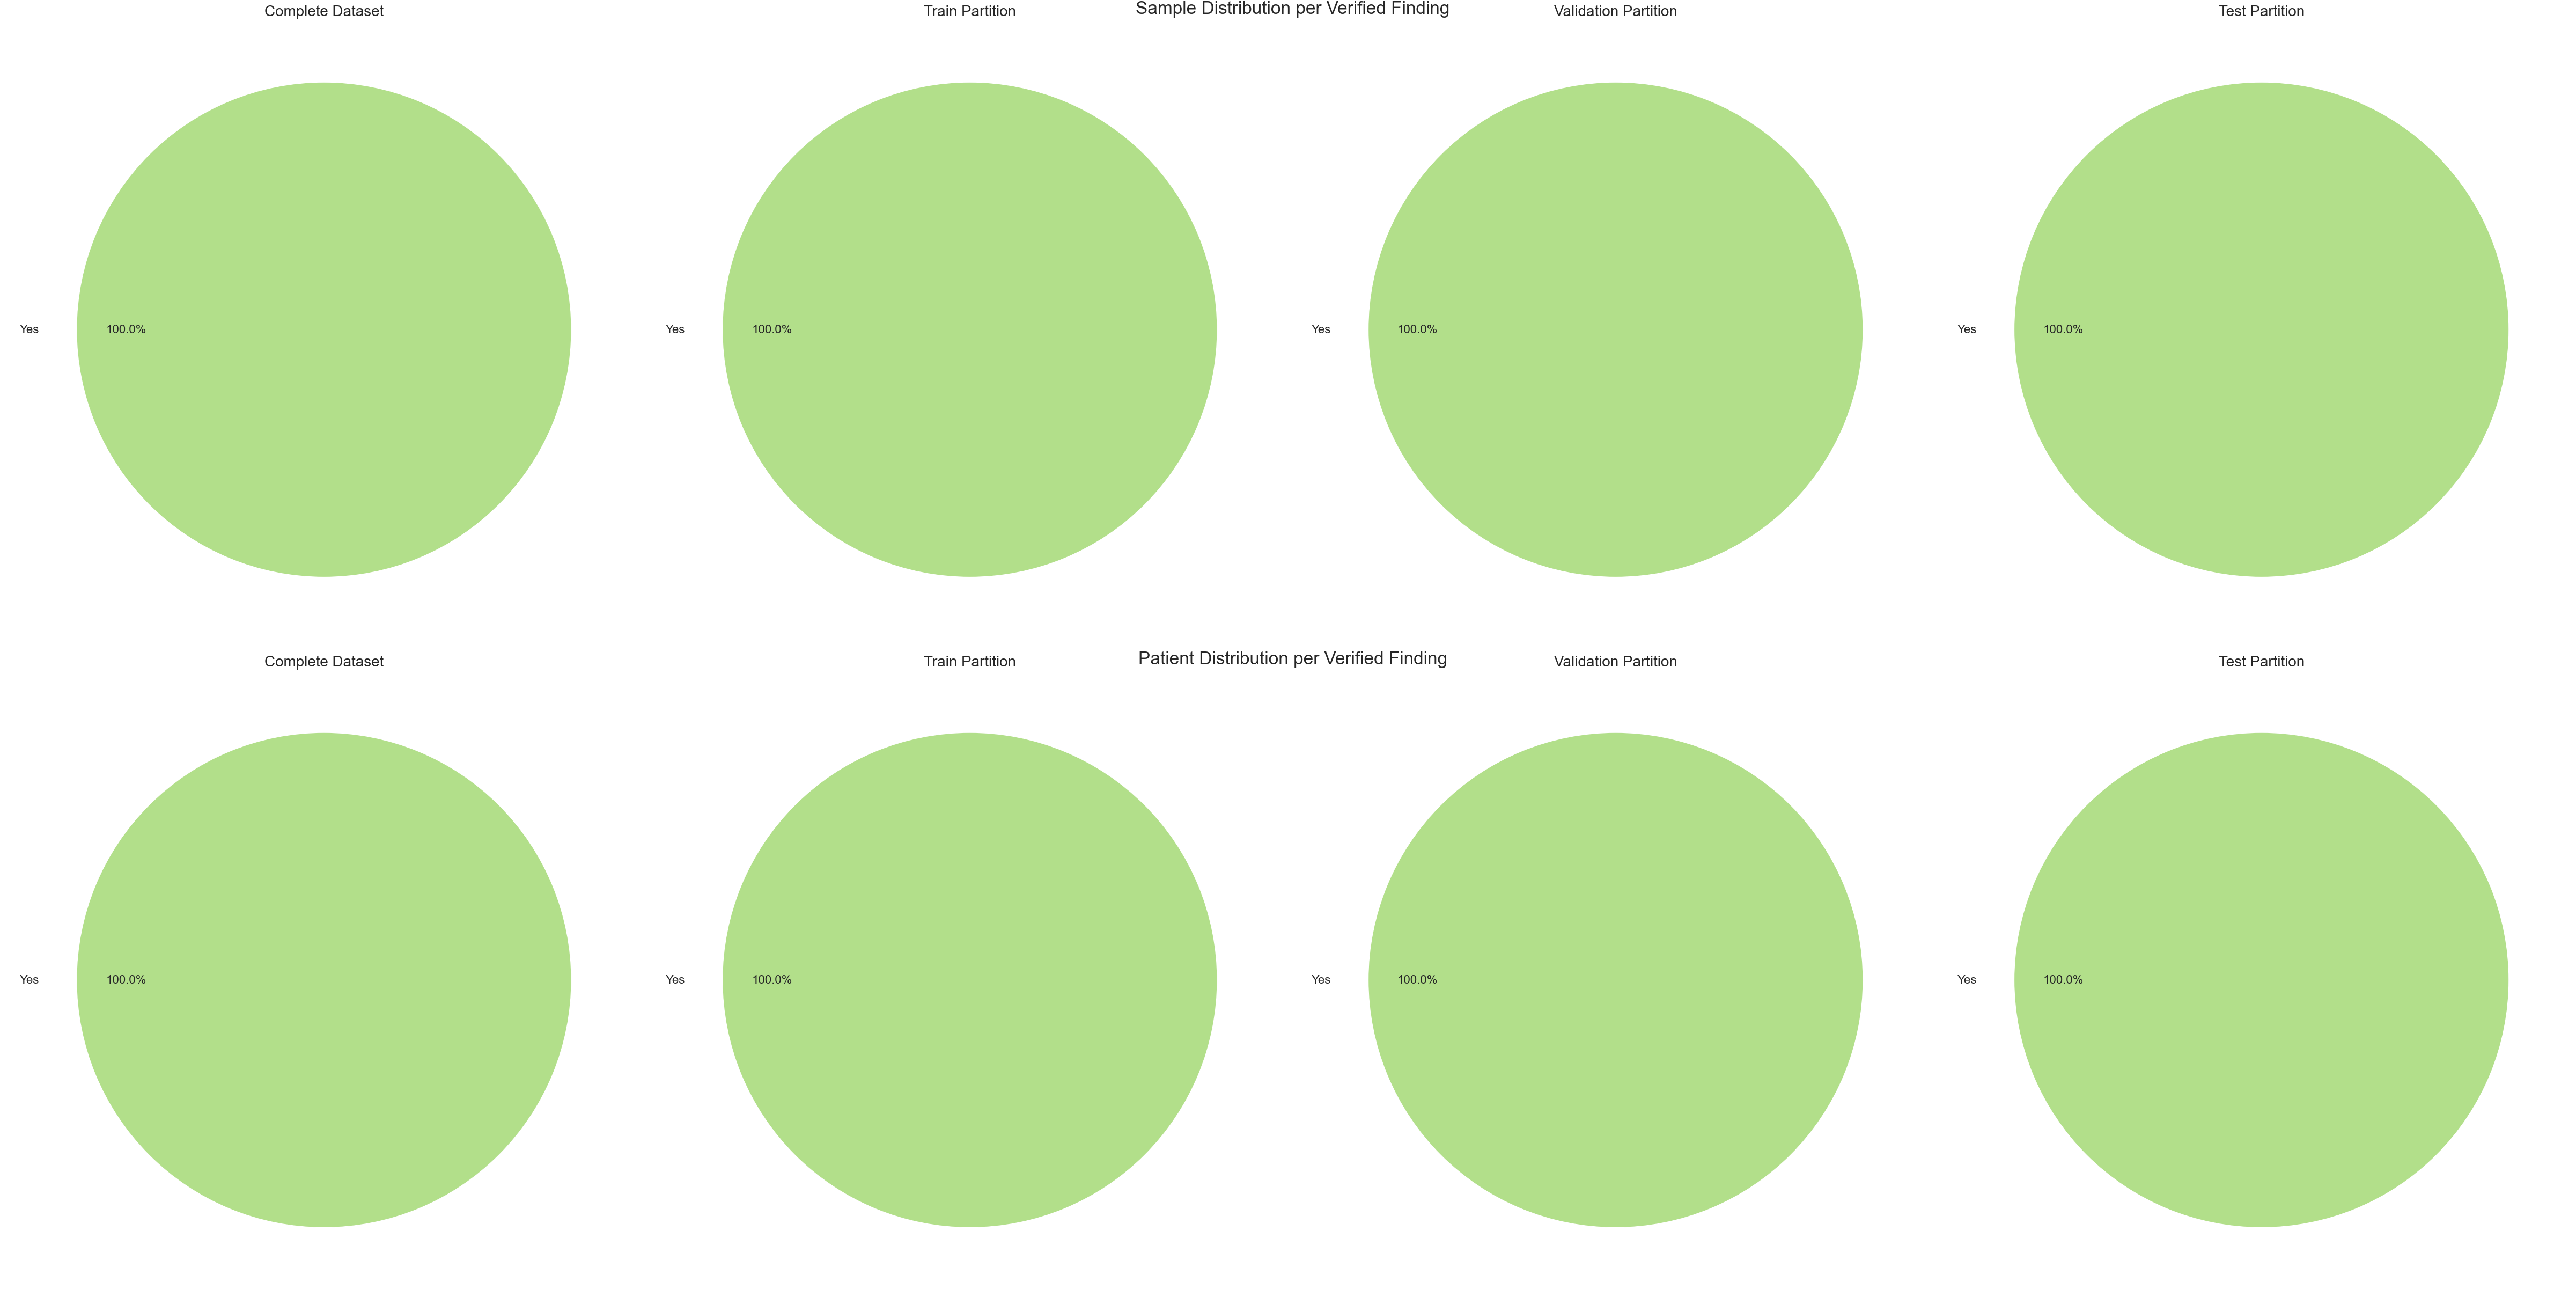

In [24]:
plot.column_as_pies( samples_df, patient_df, "verified_finding", dataset_name, figsize = (48, 24) )

In [25]:
plot.column_as_table( samples_df, patient_df, "verified_finding", dataset_name, bin_flag = False )

Sample Distribution
 by Verified Finding 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Yes 
 425024 
 254283 
 83489 
 87252 
 
 
 SUM 
 425024 
 254283 
 83489 
 87252 
 
 
 Patient Distribution
 by Verified Finding 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Yes 
 5312 
 2946 
 1037 
 1329 
 
 
 SUM 
 5312 
 2946 
 1037 
 1329

## View

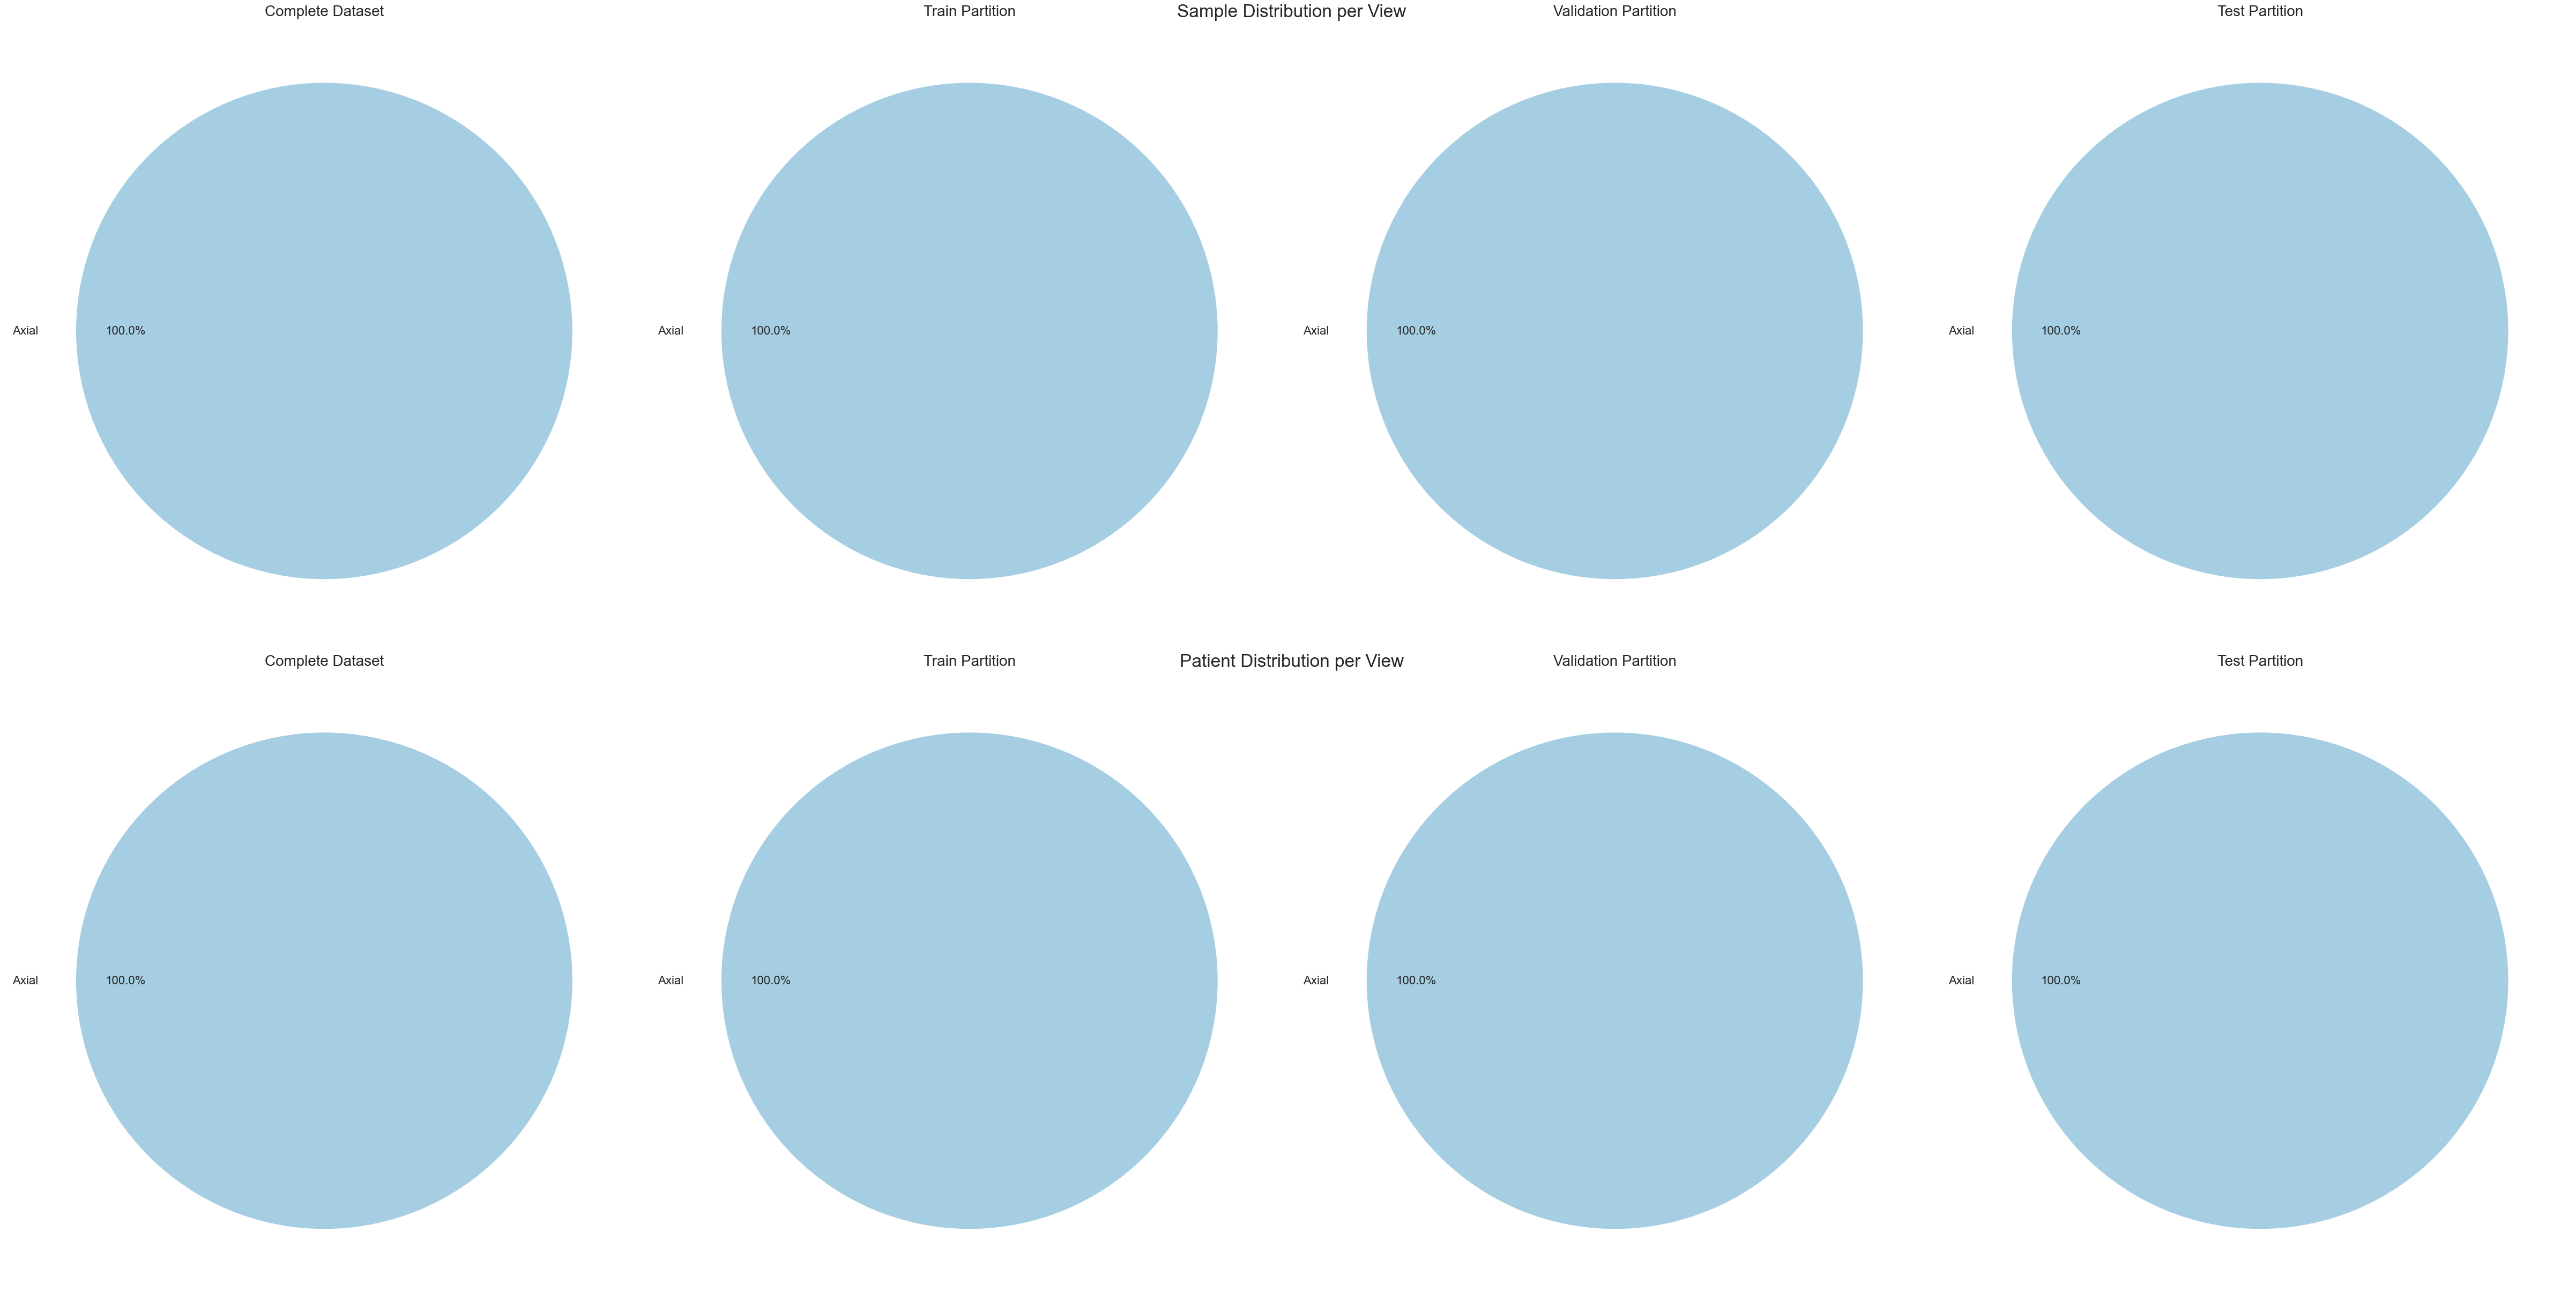

In [26]:
plot.column_as_pies( samples_df, patient_df, "view", dataset_name, figsize = (48, 24) )

In [27]:
plot.column_as_table( samples_df, patient_df, "view", dataset_name, bin_flag = False )

Sample Distribution
 by View 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Axial 
 425024 
 254283 
 83489 
 87252 
 
 
 SUM 
 425024 
 254283 
 83489 
 87252 
 
 
 Patient Distribution
 by View 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Axial 
 5312 
 2946 
 1037 
 1329 
 
 
 SUM 
 5312 
 2946 
 1037 
 1329

## Modality

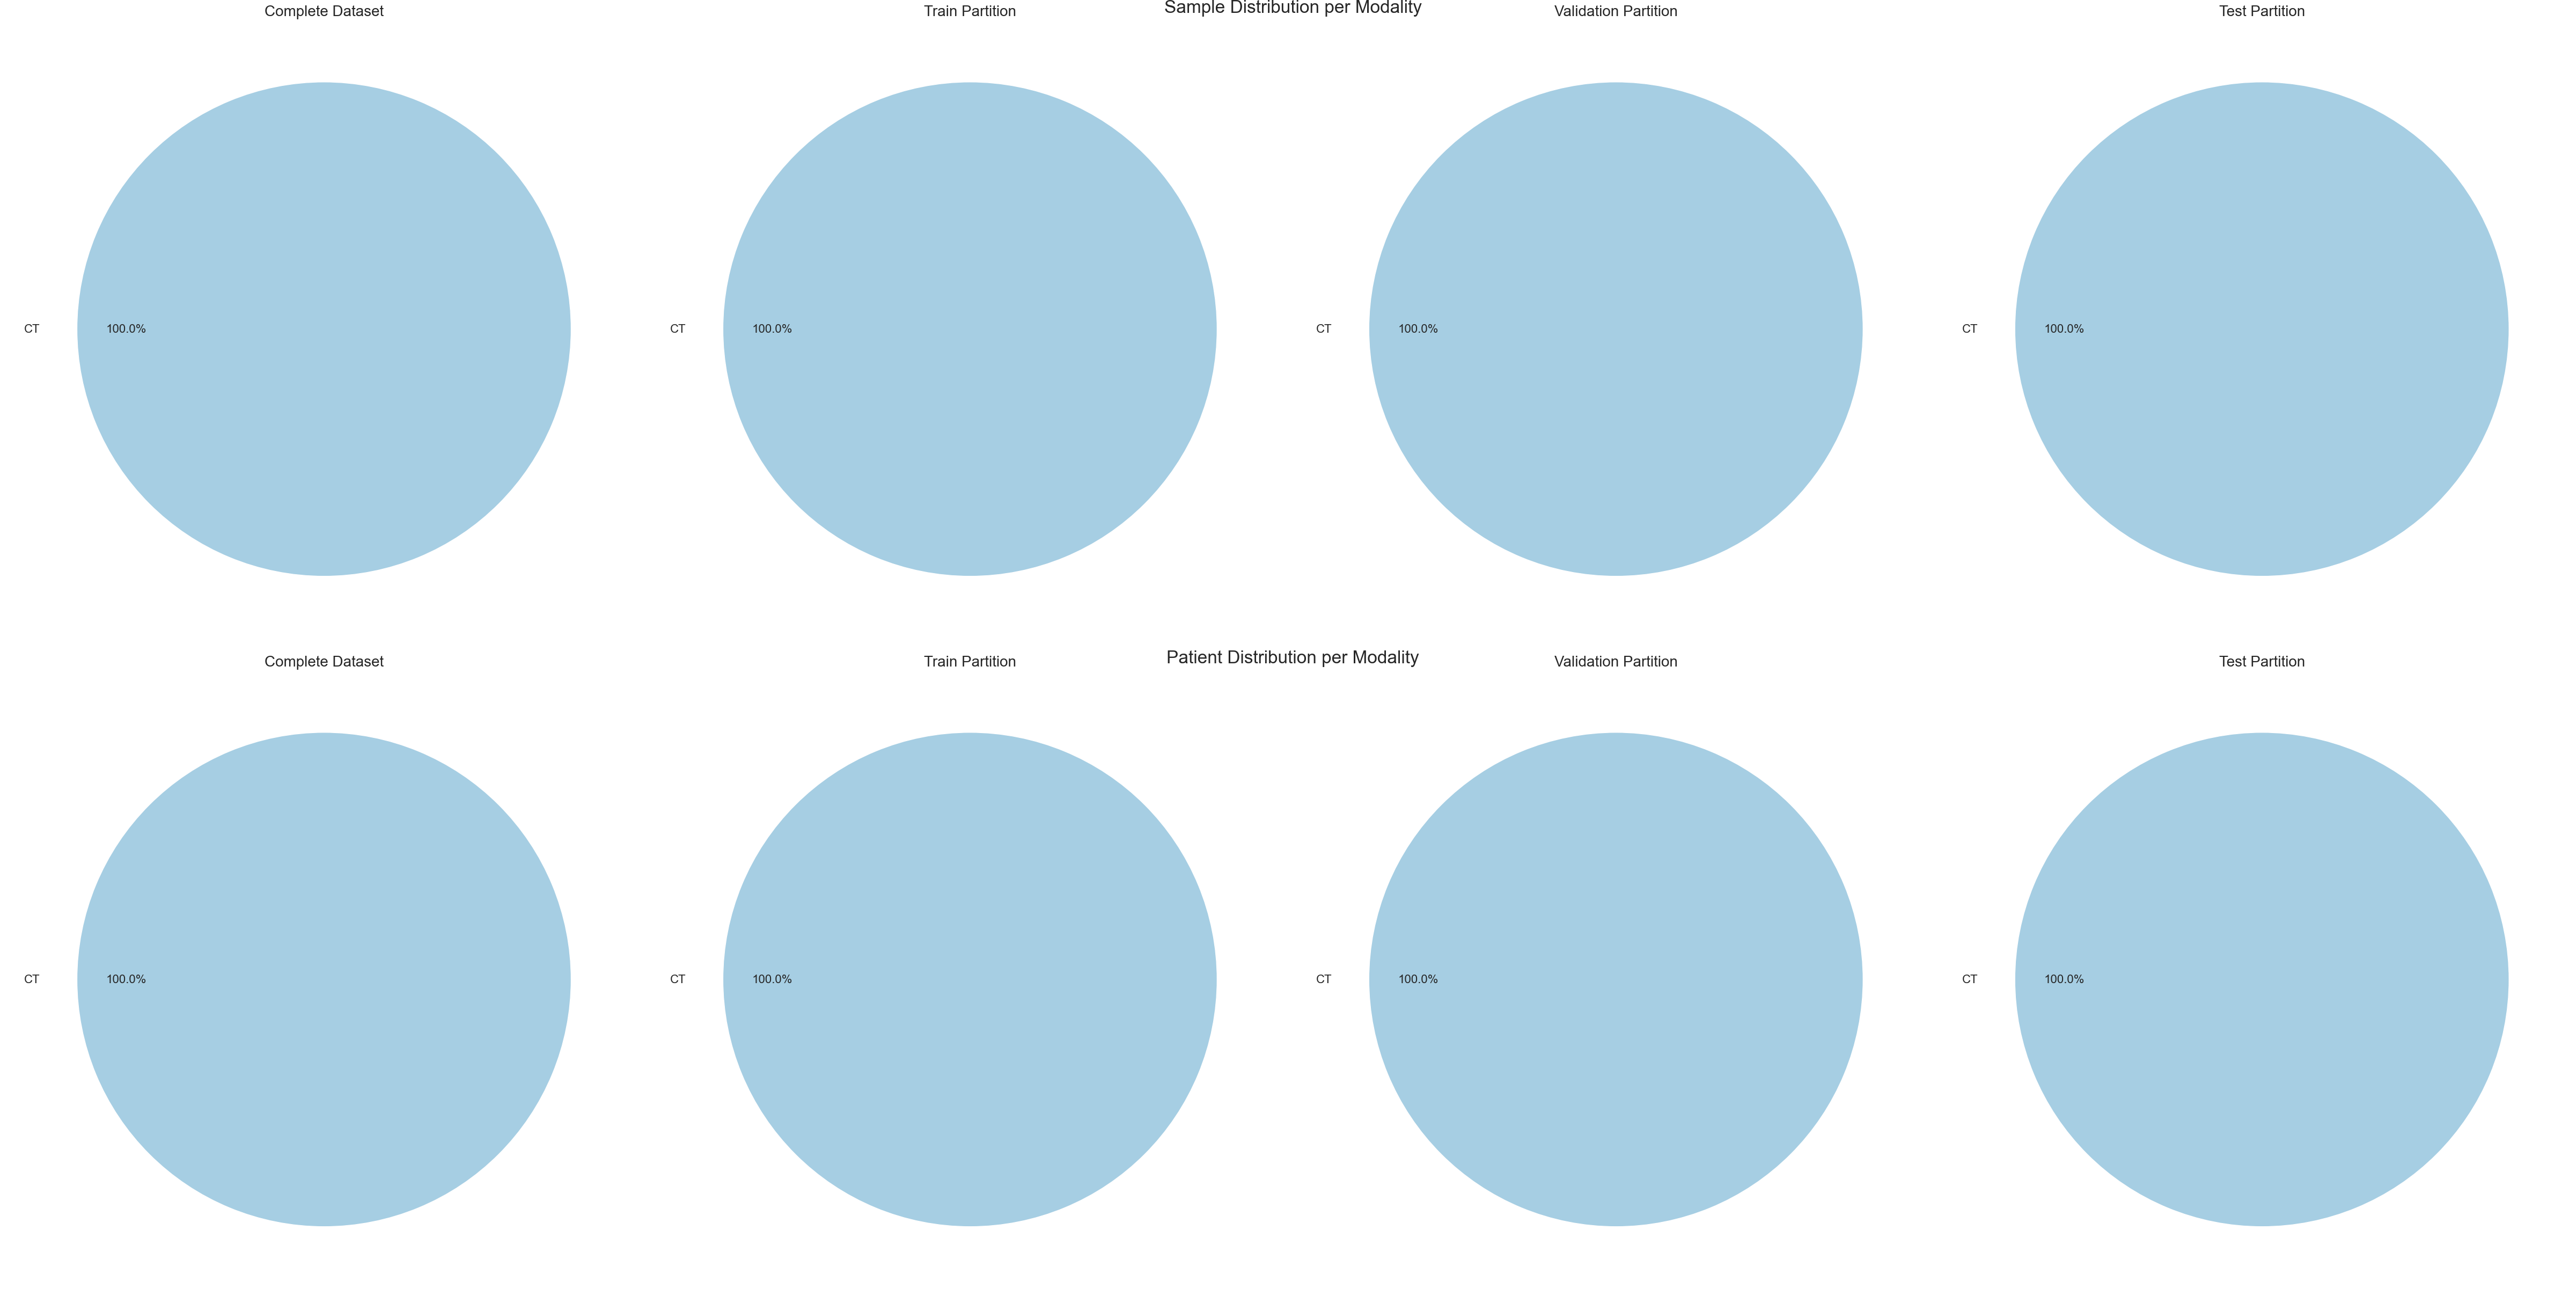

In [28]:
plot.column_as_pies( samples_df, patient_df, "modality", dataset_name, figsize = (48, 24) )

In [29]:
plot.column_as_table( samples_df, patient_df, "modality", dataset_name, bin_flag = False )

Sample Distribution
 by Modality 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 CT 
 425024 
 254283 
 83489 
 87252 
 
 
 SUM 
 425024 
 254283 
 83489 
 87252 
 
 
 Patient Distribution
 by Modality 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 CT 
 5312 
 2946 
 1037 
 1329 
 
 
 SUM 
 5312 
 2946 
 1037 
 1329